# Prueba - Fundamentos Data Science

Nombre: __Hugo Andrés Zúñiga Soto__

Profesor: Josué Fredes

Generación: __G4__

__Agradecimientos:__ Verónica Martinez y Alejandra Aravena por la colaboración durante el desarrollo.
___

## Desafío 2: Rendimiento escolar

### Enunciado
Lo contactan de una escuela Portuguesa para generar un modelo que identifique aquellos alumnos que presentan un bajo desempeño académico, medido en el promedio final del año escolar. Para ello le envían un archivo con registros sociodemográficos y conductuales de los alumnos dos escuelas
para perfilar a los estudiantes.

De manera adicional la psicopedagoga sugiere inspeccionar una batería de preguntas asociadas a aspectos ambientales del alumno (de `famrel` a `health` ) y ver si éstas se pueden abstraer en categorías latentes.

### Descripción de la base de datos
Para responder esta pregunta deben utilizar el archivo `students.csv` .
Las variables que componen la base se detallan a continuación.
* `school` : Escuela del estudiante. (binaria: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira)
* `sex` : Sexo del estudiante. (binaria: 'F' - Mujer o 'M' - Hombre)
* `age` : Edad del estudiante. (numérica: de 15 a 22)
* `address` : Ubicación de la casa del estudiante. (binaria:'U' - urbana o 'R' - rural)
* `famsize` : Tamaño de la familia. (binaria: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* `Pstatus` : Estado cohabitacional de los padres. (binaria: 'T' - cohabitando juntos o 'A' - viviendo separados)
* `Medu` : Nivel educacional de la madre. (numérica: 0 -ninguno, 1 - educación básica (4to), 2 - de
5to a 9, 3 - educación media, o 4 - educación superior).
* `Fedu` : Nivel educacional del padre. (numérica: 0 - ninguno, 1 - educación básica (4to), 2 - de 5to a 9, 3 - educación media, o 4 - educación superior).
* `Mjob` : Ocupación de la madre. (nominal: 'teacher' profesora, 'health' relacionada a salud,'services' (e.g. administración pública o policía), 'at_home' en casa u 'other' otra).
* `Fjob` : Ocupación del padre (nominal: 'teacher' profesor, 'health' relacionado a salud, 'services'
(e.g. administración pública o policía), 'at_home' en casa u 'other' otra).
* `reason` : Razón para escoger la escuela (nominal: 'home' cercano a casa, 'reputation' reputación de la escuela, 'course' preferencia de cursos u 'other' otra)
* `guardian` : Apoderado del estudiante (nominal: 'mother' madre, 'father' padre u 'other' otro)
* `traveltime` : Tiempo de viaje entre hogar y colegio. (numeric: 1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, or 4 - >1 hora).
* `studytime` : Horas semanales dedicadas al estudio.(numérica: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, o 4 - >10 horas)
* `failures` : Número de clases reprobadas. (numérica: n si 1<=n<3, de lo contrario 4)
* `schoolsup` : Apoyo educacional del colegio. (binaria: si o no)
* `famsup` : Apoyo educacional familiar. (binaria: si o no)
paid : Clases particulares pagadas (matemáticas o portugués) (binaria: si o no)
* `activities` : Actividades extracurriculares. (binaria: si o no)
* `nursery` : Asistió a guardería infantil. (binaria: si o no)
* `higher` : Desea proseguir estudios superiores (binaria: si o no)
* `internet` : Acceso a internet desde el hogar (binaria: si o no)
* `romantic` : Relación romántica (binaria: si o no)
* `famrel` : Calidad de las relaciones familiares. (numérica:de 1  - muy malas a 5 - excelentes)
* `freetime` : Tiempo libre fuera del colegio (numérica: de 1 - muy poco a 5 - mucho)
* `goout` : Salidas con amigos (numérica: de 1 - muy pocas a 5 - muchas)
* `Dalc` : Consumo de alcohol en día de semana (numérica: de 1 - muy bajo a 5 - muy alto)
* ` Walc` : Consumo de alcohol en fines de semana (numérica: de 1 - muy bajo a 5 - muy alto)
* `health` : Estado de salud actual (numérica: from 1 - muy malo to 5 - muy bueno)
* `absences` : Cantidad de ausencias escolares (numérica: de 0 a 93)
* `G1` : Notas durante el primer semestre (numérica: de 0 a 20). __Este es uno de sus vectores objetivos para el modelo descriptivo__.
* `G2` : Notas durante el segundo semestre (numérica: de 0 a 20). __Este es uno de sus vectores objetivos para el modelo descriptivo.__
* `G3` : Promedio final (numérica: de 0 a 20). __Este es uno de sus vectores objetivos para el modelo descriptivo y el vector a predecir en el modelo predictivo.__ 

#### Aspectos adicionales a considerar
+ La base de datos presenta una serie de anomalías. En la escuela no tienen buenas prácticas sobre cómo ingresar datos, por lo que existen datos perdidos que están registrados bajo tres categorías: nulidade, sem validade, zero. De manera adicional, hay 3 variables numéricas que se registraron como strings, cuya interpretación en `pandas` devuelve una estructura de datos genérica. Finalmente, la base está con un encoding distinto al normal y los delimitadores son distintos.
+ Para simplficar el análisis y su posterior inclusión en un modelo predictivo, se sugiere recodificar las variables binarias como 0 y 1. Se recomienda seguir en criterio de asignarle 1 a aquellas categorías minoritarias.
+ El procedimiento también debe aplicarse para aquelas variables nominales con más de 2 categorías siguiendo la misma lógica.
+ En la parte de modelación descriptiva, se deben generar modelos saturados por cada una de las notas registradas en `G1` , `G2` y `G3` .
+ Para la parte de modelación predictiva, se debe generar un modelo para predecir las notas en `G3`.
____

## Hito 1

### Preliminares

El objetivo es poder determinar el desempeño académico. Además, se requiere determinar qué variables y aspectos ambientales pueden afectar este rendimiento y si es posible determinar categorías latentes. Esto sugiere un problema de Regresión y Dimensionalidad.

Para medir el desempeño del modelo se utilizarán las siguientes métricas:

* Error Cuadrático Medio (MSE): El cual representa la expectativa del error cuadrático. Este indicador mide la calidad en cuanto menor sea el valor.

* R-cuadrado: Representa la capacidad explicativa del conjunto de varibales en la variabilidad del vector objetivo, donde se mide de mejor manera con valores más altos.

Otros aspectos a considerar, son el anásis factorial, el que permitirá determinar posibles categorías latentes. Para medir la cantidad de factores se utilizará:

* Prueba de esferacidad de errores de Bartlett
* Prueba de muestreo Kaiser-Meyer-Olkin (KMO)
* Medición de eigenvalues 

### Aspectos Computacionales

Para el desarrollo del modelo se debe seguir una serie de pasos, para los cuales, se requerirán las siguientes librerías:
* Ingesta y preprocesamiento:
    + `pandas`
    + `numpy`
    + `sklearn.preprocessing`
        - `StandardScaler`
    
    
* Visualización:
    + `matplotlib.pyplot`
    + `seaborn`
    + `missingno`
    + `warnings`
    
    
* Modelación:
    + `statsmodels.api`
    + `statsmodels.formula.api`
    + `sklearn`
        - `linear_model` $\rightarrow$ `LinearRegression`
        - `model_selection` $\rightarrow$ `train_test_split`
    
    
* Evaluación:
    + `sklearn.metrics`
        - `mean_squared_error`
        - `r2_score`
    + `factor_analyzer`
    
        
* Funciones externas:
    + `funciones.py`

        

Una parte importante problema, son los datos perdidos de la base de datos, y las anomalias que presenta la base de datos,
para ello se tomarán las siguientes acciones: 

1. Existen datos perdidos que están registrados bajo tres categorías: nulidade, sem validade, zero.

    __Solución:__ Los datos perdidos serán recodificados a `NAN` mediante una función auxiliar y la librería `pandas`.


2. Hay tres variables numéricas que se registraron como _strings_ cuya interpretación en `pandas` devuelve una estructura de datos genérica.

    __Solución:__ Primero se limpian las comillas dobles y luego se convierten a valores numéricos con `pd.to_number` de `pandas`.


3. La base está con un encoding distinto al normal y los delimitadores son distintos.
    
    __Solución:__ Se modifica encoding a `encoding='latin-1`, `delimiter='|'` y se dropea la primera columna `Unnamed: 0`


4. Existencia de variables con posibilidad de asignación binaria.

     __Solución:__ Será recodificado con el método `np.where` de `numpy` siguiendo las mejores practicas, asignando  `1` a quien posea _menor_ frecuencia. En caso de requerir asignación binaria con variables nominales (F=Femenino, M=Masculino por ejemplo) tambièn se realizará con `np.where` o función `replace` segun corresponda.

____

## Hito 2

### Descripción

A continuación se hará el análisis descriptivo de la base de datos y sus variables. Para esto se realizarán los siguientes pasos:

1. Inspección de datos perdidos en las variables.
2. Recodificación de variables.
3. Inspección visual del vector objetivo.
4. Inspección visual de las variables.

#### 1. Inspección de datos perdidos en las variables.

In [274]:
# Se importan las siguientes librerias:

# Para la recodificación
import pandas as pd
import numpy as np

# Para limpieza visual
import warnings
warnings.filterwarnings('ignore')

# Se importan las funciones propias necesarias también para la recodificación y limpieza
import funciones as fx

In [275]:
# Se importa la base de datos
df = pd.read_csv('data/students.csv', delimiter='|').drop(columns='Unnamed: 0', axis=1)
df.sample(10)

school sex   age address famsize Pstatus Medu  Fedu      Mjob      Fjob  \
269     GP   F  "18"       R     GT3       T    2     1     other     other   
74      GP   F  "16"       U     GT3       T    3     3     other  services   
131     GP   F  "15"       U    zero       T    1     1   at_home     other   
94      GP   M  "15"       U     LE3       T    2  zero  services    health   
266     GP   M  "17"       U     GT3       T    3     1  services     other   
191     GP   F  "17"       U     GT3       T    1     1   at_home  services   
207     GP   F  "16"       U     GT3       T    4     3   teacher     other   
240     GP   M  "17"       U     LE3       T    4     3    health     other   
242     GP   M  "16"       U     LE3       T    4     3   teacher     other   
52      GP   M  "15"       U     LE3       A    4     2    health    health   

     ... famrel freetime goout Dalc Walc health absences  G1  G2  G3  
269  ...      4        3   "5"    1    2    "3"        0   6   0   0  
74   ...      4        3   "3"    2    4    "5"       54  11  12  11  
131  ...      4        3   "3"    1    2    "4"        0   8   0   0  
94   ...      4        3   "4"    1    1    "4"        6  11  13  14  
266  ...      5        4   "4"    3    4    "5"        2   9   9  10  
191  ...      5        3   "3"    1    1    "3"        0   8   8   9  
207  ...      1        3   "2"    1    1    "1"       10  11  12  13  
240  ...      2        5   "5"    1    4    "5"       14  12  12  12  
242  ...      5        4   "5"    1    1    "3"        0   6   0   0  
52   ...      5        5   "5"    3    4    "5"        6  11  11  10  

[10 rows x 33 columns]

In [276]:
# Se revisa la cantidad de registros y atributos
df.shape

(395, 33)

In [277]:
# Los valores perdidos están presentes como nulidade, sem validade y zero
# Para solucionarlo aplcaremos la funcion clean_data()
clean_df = fx.clean_data(df, 'nulidade')
clean_df = fx.clean_data(clean_df, 'sem validade')
clean_df = fx.clean_data(clean_df, 'zero')
clean_df.sample(10)

school sex   age address famsize Pstatus Medu Fedu      Mjob      Fjob  \
173     GP   F  "16"       U     GT3       T    1    3   at_home  services   
19      GP   M  "16"       U     LE3       T    4    3    health     other   
255     GP   M  "17"       U     LE3       T    1    1    health     other   
303     GP   F  "17"       U     GT3       T    3    2    health    health   
247     GP   M  "22"       U     GT3       T    3    1  services  services   
273     GP   M  "17"       R     GT3       T    1    2   at_home   at_home   
54      GP   F  "15"       U     LE3       A    3    3     other     other   
37      GP   M  "16"       R     GT3       A    4    4     other   teacher   
279     GP   M  "18"       U     LE3       T    4    3   teacher  services   
340     GP   F  "19"       U     GT3       T    2    1  services  services   

     ... famrel freetime goout Dalc Walc health absences  G1  G2  G3  
173  ...      4        3   "5"    1    1    "3"        0   8   7   0  
19   ...      3        1   "3"    1    3    "5"        4   8  10  10  
255  ...      4        4   "4"    1    2    "5"        2   7   9   8  
303  ...      5        2   "2"    1    2    "5"        0  17  17  18  
247  ...      5        4   "5"    5    5    NaN       16   6   8   8  
273  ...      3        5   "2"    2    2    "1"        2  15  14  14  
54   ...      5        3   "4"    4    4    "1"        6  10  13  13  
37   ...      2        4   "3"    1    1    "5"        7  15  16  15  
279  ...      4        2   "3"    1    2    "1"        8  10  11  10  
340  ...      4        3   "4"    1    3    "3"        4  11  12  11  

[10 rows x 33 columns]

In [278]:
# Eliminar datos duplicados y verificar tamaño de nueva DB
clean_df = clean_df.drop_duplicates()
clean_df.shape

(395, 33)

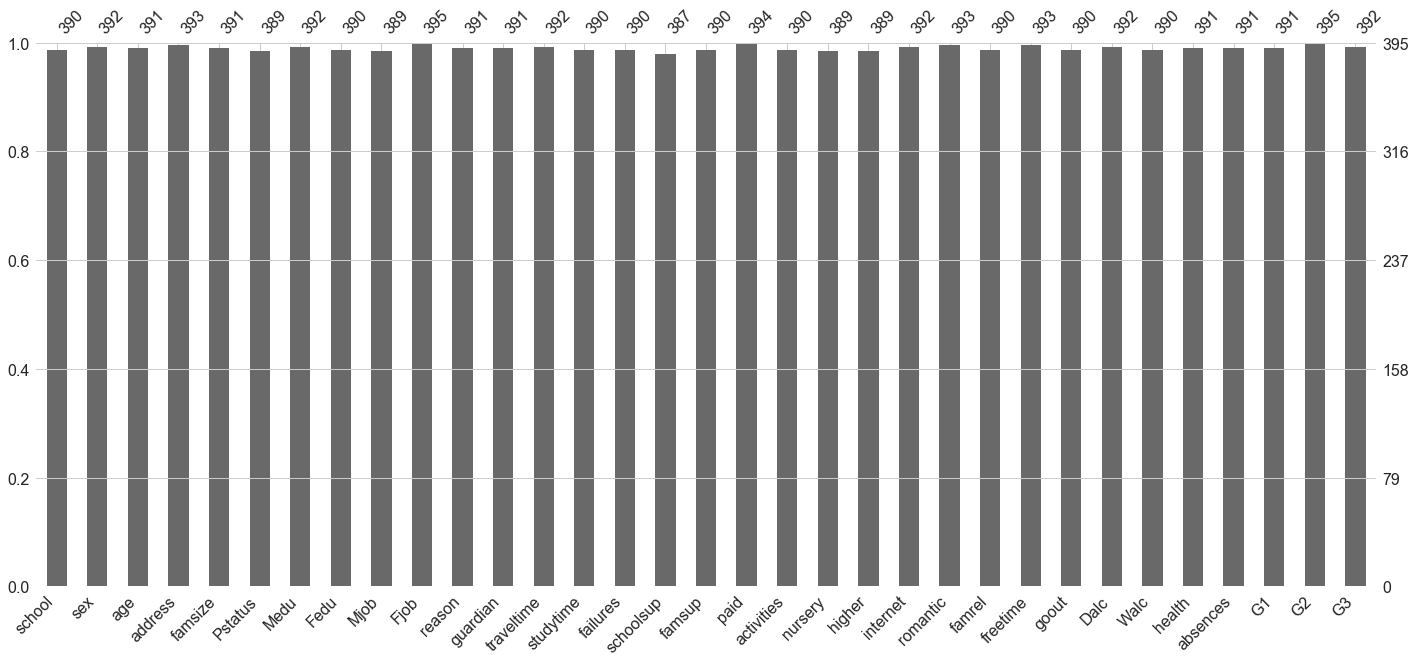

In [279]:
# Verificar los datos perdidos a través de missingno
import missingno as msgn

msgn.bar(clean_df)

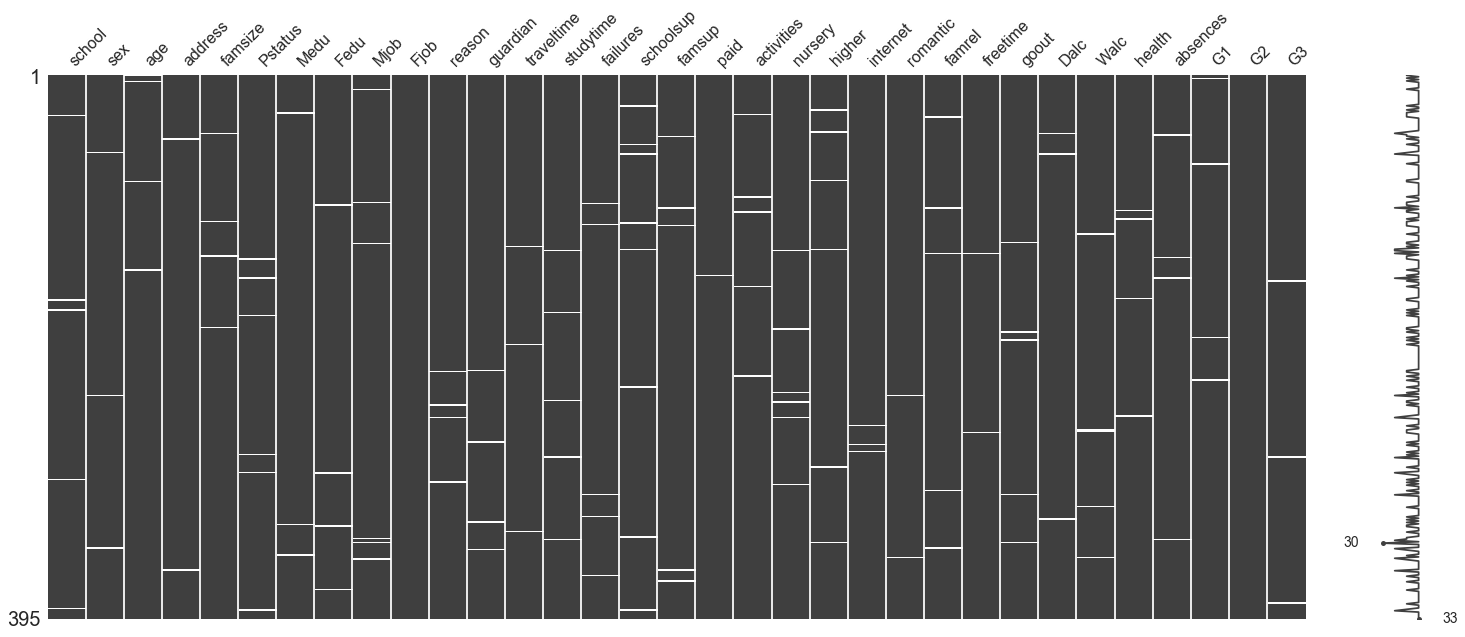

In [280]:
msgn.matrix(clean_df)

In [281]:
# Se eliminan los datos perdidos en un nuevo dataframe
final_df = clean_df.dropna()
final_df.shape

(284, 33)

In [282]:
# Se debe corregir el tipo de dato de las variables que deberían ser numéricas
final_df['age'].unique()

array(['"17"', '"15"', '"16"', '"18"', '"19"', '"20"', '"21"'],
      dtype=object)

In [283]:
final_df['age'] = final_df['age'].str.replace('"','')
final_df['age'] = pd.to_numeric(final_df['age'])
final_df.sample(10)

school sex  age address famsize Pstatus Medu Fedu      Mjob      Fjob  \
16      GP   F   16       U     GT3       T    4    4  services  services   
260     GP   F   18       U     GT3       T    4    3  services     other   
334     GP   F   18       R     GT3       T    2    2   at_home     other   
38      GP   F   15       R     GT3       T    3    4  services    health   
179     GP   M   17       U     GT3       T    4    3     other     other   
159     GP   M   16       U     GT3       T    3    3     other  services   
291     GP   F   17       U     GT3       T    4    3    health  services   
384     MS   M   18       R     GT3       T    4    2     other     other   
276     GP   F   18       R     GT3       A    3    2     other  services   
392     MS   M   21       R     GT3       T    1    1     other     other   

     ... famrel freetime goout Dalc Walc health absences  G1  G2  G3  
16   ...      3        2   "3"    1    2    "2"        6  13  14  14  
260  ...      3        1   "2"    1    3    "2"       21  17  18  18  
334  ...      4        4   "4"    1    1    "4"        0  10   9   0  
38   ...      4        3   "2"    1    1    "5"        2  12  12  11  
179  ...      5        2   "3"    1    1    "2"        4  10  10  11  
159  ...      4        5   "5"    4    4    "5"        4  10  12  12  
291  ...      4        2   "2"    1    2    "3"        0  15  15  15  
384  ...      5        4   "3"    4    3    "3"       14   6   5   5  
276  ...      4        1   "1"    1    1    "5"       75  10   9   9  
392  ...      5        5   "3"    3    3    "3"        3  10   8   7  

[10 rows x 33 columns]

In [284]:
# Valido los valores de Medu
final_df['Medu'].unique()

array(['1', '4', '2', '3', '0'], dtype=object)

In [285]:
final_df['Medu'] = pd.to_numeric(final_df['Medu'])
final_df['Medu'].unique()

array([1, 4, 2, 3, 0])

In [286]:
# Valido los valores de Fedu
final_df['Fedu'] = pd.to_numeric(final_df['Fedu'])
final_df['Fedu'].unique()

array([1, 2, 3, 4, 0])

In [287]:
# Valido los valores de traveltime
final_df['traveltime'] = pd.to_numeric(final_df['traveltime'])
final_df['traveltime'].unique()

array([1, 2, 3, 4])

In [288]:
# Valido los valores de studytime
final_df['studytime'] = pd.to_numeric(final_df['studytime'])
final_df['studytime'].unique()

array([2, 3, 1, 4])

In [289]:
# Valido los valores de failures
final_df['failures'] = pd.to_numeric(final_df['failures'])
final_df['failures'].unique()

array([0, 3, 1, 2])

In [290]:
# Valido los valores de famrel
final_df['famrel'] = pd.to_numeric(final_df['famrel'])
final_df['famrel'].unique()

array([5, 3, 4, 2, 1])

In [291]:
# Valido los valores de freetime
final_df['freetime'] = pd.to_numeric(final_df['freetime'])
final_df['freetime'].unique()

array([3, 2, 4, 1, 5])

In [292]:
# Valido los valores de goout
final_df['goout'] = final_df['goout'].str.replace('"','')
final_df['goout'] = pd.to_numeric(final_df['goout'])
final_df['goout'].unique()

array([3, 2, 4, 1, 5])

In [293]:
# Valido los valores de Dalc
final_df['Dalc'] = pd.to_numeric(final_df['Dalc'])
final_df['Dalc'].unique()

array([1, 2, 3, 4, 5])

In [294]:
# Valido los valores de Walc
final_df['Walc'] = pd.to_numeric(final_df['Walc'])
final_df['Walc'].unique()

array([1, 2, 3, 4, 5])

In [295]:
# Valido los valores de health
final_df['health'] = final_df['health'].str.replace('"','')
final_df['health'] = pd.to_numeric(final_df['health'])
final_df['health'].unique()

array([3, 5, 1, 4, 2])

In [296]:
# Valido los valores de health
final_df['absences'] = pd.to_numeric(final_df['absences'])
final_df['absences'].unique()

array([ 4,  2, 10,  0,  6, 16,  7,  8, 25, 12, 54, 18, 14, 26, 20, 24, 28,
        5, 13, 15, 22, 21,  1, 75, 30, 19, 11, 38,  3, 40,  9, 17])

In [297]:
# Valido los valores de G1
final_df['G1'] = pd.to_numeric(final_df['G1'])
final_df['G1'].unique()

array([ 5, 15, 12,  6, 16, 14, 10, 13,  8, 17,  7, 19, 11,  9, 18,  4])

In [298]:
# Valido los valores de G2
final_df['G2'] = pd.to_numeric(final_df['G2'])
final_df['G2'].unique()

array([ 5, 14, 15, 12, 18, 10, 16, 13,  9,  7,  8, 19, 11,  6, 17,  4,  0])

In [299]:
# Valido los valores de G2
final_df['G3'] = pd.to_numeric(final_df['G3'])
final_df['G3'].unique()

array([ 6, 15, 11, 19, 12, 14, 16, 10,  5,  8, 17, 18, 13, 20,  7,  9,  0,
        4])

In [300]:
# Se valida el tipo de dato
final_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [301]:
# Se revisan los atributos y su estructura
for i in pd.Series(final_df.columns):
    print(f'\nVariable: {i}')
    print(final_df[i].describe())


Variable: school
count     284
unique      2
top        GP
freq      247
Name: school, dtype: object

Variable: sex
count     284
unique      2
top         F
freq      147
Name: sex, dtype: object

Variable: age
count    284.000000
mean      16.707746
std        1.284238
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       21.000000
Name: age, dtype: float64

Variable: address
count     284
unique      2
top         U
freq      214
Name: address, dtype: object

Variable: famsize
count     284
unique      2
top       GT3
freq      209
Name: famsize, dtype: object

Variable: Pstatus
count     284
unique      2
top         T
freq      257
Name: Pstatus, dtype: object

Variable: Medu
count    284.000000
mean       2.774648
std        1.095409
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

Variable: Fedu
count    284.000000
mean       2.521127
std        1.091038
min       

#### 2. Recodificación de variables.

In [302]:
# Recodificación de variables binarias
var_bin = ['school','sex','address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery','higher',
           'internet','romantic']

In [303]:
# Recodificación de variable 'school'
final_df['school'].value_counts()

GP    247
MS     37
Name: school, dtype: int64

In [304]:
final_df['MS_school'] = np.where(final_df['school'].str.strip() == 'MS', 1, 0)
final_df.sample(5)

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
114     GP   M   15       R     GT3       T     2     1   health  services   
120     GP   F   15       U     GT3       T     1     2  at_home  services   
62      GP   F   16       U     LE3       T     1     2    other  services   
262     GP   M   18       R     GT3       T     3     2    other     other   
279     GP   M   18       U     LE3       T     4     3  teacher  services   

     ... freetime goout  Dalc  Walc  health absences  G1  G2  G3 MS_school  
114  ...        4     2     1     1       5        8   9   9   9         0  
120  ...        2     3     1     2       1        2  16  15  15         0  
62   ...        4     3     1     1       1        4   8  10   9         0  
262  ...        3     2     1     1       3        1  13  12  12         0  
279  ...        2     3     1     2       1        8  10  11  10         0  

[5 rows x 34 columns]

In [305]:
# Recodificación de variable binarias 'sex'
final_df['sex'].value_counts()

F    147
M    137
Name: sex, dtype: int64

In [306]:
final_df['is_male'] = np.where(final_df['sex'].str.strip() == 'M', 1, 0)
final_df.sample(5)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
155     GP   M   15       R     GT3       T     2     3   at_home  services   
262     GP   M   18       R     GT3       T     3     2     other     other   
165     GP   M   16       U     GT3       T     3     2  services  services   
206     GP   F   16       U     GT3       A     3     1  services     other   
332     GP   F   18       U     GT3       T     3     3  services  services   

     ... goout Dalc  Walc  health  absences  G1  G2  G3 MS_school is_male  
155  ...     4    1     1       1         2  11   8   8         0       1  
262  ...     2    1     1       3         1  13  12  12         0       1  
165  ...     2    1     1       2        16  12  11  12         0       1  
206  ...     3    2     2       4         5   7   7   7         0       0  
332  ...     4    1     1       4         0   7   0   0         0       0  

[5 rows x 35 columns]

In [307]:
# Recodificación de variable binarias 'address'
final_df['address'].value_counts()

U    214
R     70
Name: address, dtype: int64

In [308]:
final_df['is_address_R'] = np.where(final_df['address'].str.strip() == 'R', 1, 0)
final_df.sample(5)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob     Fjob  \
26      GP   M   15       U     GT3       T     2     2     other    other   
305     GP   F   18       U     GT3       T     2     4  services  at_home   
246     GP   M   17       U     GT3       T     2     3     other    other   
269     GP   F   18       R     GT3       T     2     1     other    other   
110     GP   M   15       U     LE3       A     4     4   teacher  teacher   

     ... Dalc Walc  health  absences  G1  G2  G3 MS_school is_male  \
26   ...    1    2       5         2  12  12  11         0       1   
305  ...    1    1       3         8  14  12  12         0       0   
246  ...    1    1       2         4  12  12  13         0       1   
269  ...    1    2       3         0   6   0   0         0       0   
110  ...    1    1       4         6  18  19  19         0       1   

    is_address_R  
26             0  
305            0  
246            0  
269            1  
110            0  

[5 rows x 36 columns]

In [309]:
# Recodificación de variable binarias 'famsize'
final_df['famsize'].value_counts()

GT3    209
LE3     75
Name: famsize, dtype: int64

In [310]:
final_df['is_famsize_LE3'] = np.where(final_df['famsize'].str.strip() == 'LE3', 1, 0)
final_df.sample(5)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
211     GP   M   17       U     LE3       T     4     4  services     other   
20      GP   M   15       U     GT3       T     4     3   teacher     other   
180     GP   M   16       U     GT3       T     4     3   teacher     other   
23      GP   M   16       U     LE3       T     2     2     other     other   
356     MS   F   17       R     GT3       T     4     4   teacher  services   

     ... Walc health  absences  G1  G2  G3 MS_school is_male is_address_R  \
211  ...    5      3        13  12  12  13         0       1            0   
20   ...    1      1         0  13  14  15         0       1            0   
180  ...    3      3        10   9   8   8         0       1            0   
23   ...    4      5         0  13  13  12         0       1            0   
356  ...    2      5         4  12  13  13         1       0            1   

    is_famsize_LE3  
211              1  
20               0  
180              0  
23               1  
356              0  

[5 rows x 37 columns]

In [311]:
# Recodificación de variable binarias 'Pstatus'
final_df['Pstatus'].value_counts()

T    257
A     27
Name: Pstatus, dtype: int64

In [312]:
final_df['is_Pstatus_A'] = np.where(final_df['Pstatus'].str.strip() == 'A', 1, 0)
final_df.sample(5)

school sex  age address famsize Pstatus  Medu  Fedu     Mjob     Fjob  \
23      GP   M   16       U     LE3       T     2     2    other    other   
378     MS   F   18       U     GT3       T     3     3    other    other   
97      GP   F   16       U     GT3       T     2     1    other    other   
353     MS   M   19       R     GT3       T     1     1    other    other   
134     GP   M   15       R     GT3       T     3     4  at_home  teacher   

     ... health absences  G1  G2  G3 MS_school is_male is_address_R  \
23   ...      5        0  13  13  12         0       1            0   
378  ...      1        0  15  15  15         1       0            0   
97   ...      5        2   8   9  10         0       0            0   
353  ...      5        4   8   8   8         1       1            1   
134  ...      5        0   9   0   0         0       1            1   

    is_famsize_LE3 is_Pstatus_A  
23               1            0  
378              0            0  
97               0            0  
353              0            0  
134              0            0  

[5 rows x 38 columns]

In [313]:
# Recodificación de variable binarias 'schoolsup'
final_df['schoolsup'].value_counts()

no     246
yes     38
Name: schoolsup, dtype: int64

In [314]:
final_df['is_schoolsup'] = np.where(final_df['schoolsup'].str.strip() == 'yes', 1, 0)
final_df.sample(5)

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
87      GP   F   15       U     GT3       T     4     2    other     other   
358     MS   M   18       U     LE3       T     1     1    other  services   
136     GP   M   17       R     GT3       T     3     4  at_home     other   
161     GP   M   15       R     GT3       T     3     2    other     other   
205     GP   F   17       U     GT3       T     3     4  at_home  services   

     ... absences  G1  G2  G3  MS_school is_male is_address_R is_famsize_LE3  \
87   ...        4  13  14  14          0       0            0              0   
358  ...        4  10  10  10          1       1            0              1   
136  ...        0  10   0   0          0       1            1              0   
161  ...        6   5   9   7          0       1            1              0   
205  ...       28  10   9   9          0       0            0              0   

    is_Pstatus_A is_schoolsup  
87             0            0  
358            0            0  
136            0            0  
161            0            1  
205            0            0  

[5 rows x 39 columns]

In [315]:
# Recodificación de variable binarias 'famsup'
final_df['famsup'].value_counts()

yes    174
no     110
Name: famsup, dtype: int64

In [316]:
final_df['non_famsup'] = np.where(final_df['famsup'].str.strip() == 'no', 1, 0)
final_df.sample(5)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
208     GP   F   16       U     GT3       T     1     1   at_home     other   
256     GP   F   17       U     LE3       T     4     2   teacher  services   
287     GP   F   17       U     GT3       T     1     1  services   teacher   
151     GP   M   16       U     LE3       T     2     1   at_home     other   
235     GP   M   16       U     GT3       T     3     2   at_home     other   

     ...  G1  G2  G3  MS_school  is_male is_address_R is_famsize_LE3  \
208  ...   9   9  10          0        0            0              0   
256  ...  14  12  13          0        0            0              1   
287  ...  13  12  12          0        0            0              0   
151  ...  12  13  14          0        1            0              1   
235  ...  11   9  10          0        1            0              0   

    is_Pstatus_A is_schoolsup non_famsup  
208            0            0          0  
256            0            0          0  
287            0            0          0  
151            0            0          1  
235            0            0          1  

[5 rows x 40 columns]

In [317]:
# Recodificación de variable binarias 'paid'
final_df['paid'].value_counts()

no     158
yes    126
Name: paid, dtype: int64

In [318]:
final_df['is_paid'] = np.where(final_df['paid'].str.strip() == 'yes', 1, 0)
final_df.sample(5)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
255     GP   M   17       U     LE3       T     1     1    health     other   
252     GP   M   18       U     GT3       T     2     1  services  services   
307     GP   M   19       U     GT3       T     4     4   teacher  services   
136     GP   M   17       R     GT3       T     3     4   at_home     other   
346     GP   M   18       R     GT3       T     4     3   teacher  services   

     ...  G2  G3  MS_school  is_male  is_address_R is_famsize_LE3  \
255  ...   9   8          0        1             0              1   
252  ...   9   8          0        1             0              0   
307  ...   9   8          0        1             0              0   
136  ...   0   0          0        1             1              0   
346  ...  15  16          0        1             1              0   

    is_Pstatus_A is_schoolsup non_famsup is_paid  
255            0            0          0       0  
252            0            0          1       0  
307            0            0          0       1  
136            0            0          1       0  
346            0            0          1       0  

[5 rows x 41 columns]

In [319]:
# Recodificación de variable binarias 'activities'
final_df['activities'].value_counts()

yes    148
no     136
Name: activities, dtype: int64

In [320]:
final_df['non_activities'] = np.where(final_df['activities'].str.strip() == 'no', 1, 0)
final_df.sample(5)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob     Fjob  \
111     GP   F   16       R     GT3       T     3     3  services    other   
216     GP   F   17       U     GT3       T     4     3     other    other   
309     GP   F   19       U     LE3       T     1     1   at_home    other   
274     GP   F   17       U     GT3       T     2     4   at_home   health   
372     MS   F   17       U     GT3       T     2     2     other  at_home   

     ...  G3 MS_school  is_male  is_address_R  is_famsize_LE3 is_Pstatus_A  \
111  ...  10         0        0             1               0            0   
216  ...   4         0        0             0               0            0   
309  ...  10         0        0             0               1            0   
274  ...  10         0        0             0               0            0   
372  ...  11         1        0             0               0            0   

    is_schoolsup non_famsup is_paid non_activities  
111            1          0       0              0  
216            0          1       1              1  
309            1          0       0              0  
274            0          0       1              1  
372            0          1       0              0  

[5 rows x 42 columns]

In [321]:
# Recodificación de variable binarias 'nursery'
final_df['nursery'].value_counts()

yes    223
no      61
Name: nursery, dtype: int64

In [322]:
final_df['non_nursery'] = np.where(final_df['nursery'].str.strip() == 'no', 1, 0)
final_df.sample(5)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
31      GP   M   15       U     GT3       T     4     4  services  services   
382     MS   M   17       U     GT3       T     2     3     other  services   
206     GP   F   16       U     GT3       A     3     1  services     other   
332     GP   F   18       U     GT3       T     3     3  services  services   
175     GP   M   17       U     LE3       T     4     3   teacher     other   

     ... MS_school is_male  is_address_R  is_famsize_LE3  is_Pstatus_A  \
31   ...         0       1             0               0             0   
382  ...         1       1             0               0             0   
206  ...         0       0             0               0             1   
332  ...         0       0             0               0             0   
175  ...         0       1             0               1             0   

    is_schoolsup non_famsup is_paid non_activities non_nursery  
31             0          0       0              0           0  
382            0          1       0              0           0  
206            0          0       1              1           0  
332            0          1       0              0           0  
175            0          1       1              0           0  

[5 rows x 43 columns]

In [323]:
# Recodificación de variable binarias 'higher'
final_df['higher'].value_counts()

yes    269
no      15
Name: higher, dtype: int64

In [324]:
final_df['non_higher'] = np.where(final_df['higher'].str.strip() == 'no', 1, 0)
final_df.sample(5)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
11      GP   F   15       U     GT3       T     2     1  services     other   
12      GP   M   15       U     LE3       T     4     4    health  services   
19      GP   M   16       U     LE3       T     4     3    health     other   
140     GP   M   15       U     GT3       T     4     3   teacher  services   
171     GP   M   16       U     GT3       T     1     0     other     other   

     ... is_male is_address_R  is_famsize_LE3  is_Pstatus_A  is_schoolsup  \
11   ...       0            0               0             0             0   
12   ...       1            0               1             0             0   
19   ...       1            0               1             0             0   
140  ...       1            0               0             0             1   
171  ...       1            0               0             0             0   

    non_famsup is_paid non_activities non_nursery non_higher  
11           0       0              0           0          0  
12           0       1              0           0          0  
19           1       1              0           0          0  
140          0       0              1           0          0  
171          0       1              0           0          0  

[5 rows x 44 columns]

In [325]:
# Recodificación de variable binarias 'internet'
final_df['internet'].value_counts()

yes    231
no      53
Name: internet, dtype: int64

In [326]:
final_df['non_internet'] = np.where(final_df['internet'].str.strip() == 'no', 1, 0)
final_df.sample(5)

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
148     GP   M   16       U     GT3       T     4     4  teacher   teacher   
377     MS   F   18       R     LE3       T     4     4  teacher  services   
210     GP   F   19       U     GT3       T     3     3    other     other   
164     GP   M   17       R     LE3       T     1     1    other  services   
278     GP   F   18       U     GT3       T     4     4   health    health   

     ... is_address_R is_famsize_LE3  is_Pstatus_A  is_schoolsup  non_famsup  \
148  ...            0              0             0             0           0   
377  ...            1              1             0             0           1   
210  ...            0              0             0             0           0   
164  ...            1              1             0             0           1   
278  ...            0              0             0             1           0   

    is_paid non_activities non_nursery non_higher non_internet  
148       0              1           0          1            0  
377       1              0           0          0            0  
210       1              0           0          0            0  
164       0              0           0          1            1  
278       0              0           0          0            0  

[5 rows x 45 columns]

In [327]:
# Recodificación de variable binarias 'romantic'
final_df['romantic'].value_counts()

no     189
yes     95
Name: romantic, dtype: int64

In [328]:
final_df['is_romantic'] = np.where(final_df['romantic'].str.strip() == 'yes', 1, 0)
final_df.sample(5)

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
272     GP   F   18       U     LE3       T     1     1    other     other   
246     GP   M   17       U     GT3       T     2     3    other     other   
377     MS   F   18       R     LE3       T     4     4  teacher  services   
223     GP   M   18       U     GT3       T     2     2    other     other   
346     GP   M   18       R     GT3       T     4     3  teacher  services   

     ... is_famsize_LE3 is_Pstatus_A  is_schoolsup  non_famsup  is_paid  \
272  ...              1            0             0           0        1   
246  ...              0            0             0           1        0   
377  ...              1            0             0           1        1   
223  ...              0            0             0           0        1   
346  ...              0            0             0           1        0   

    non_activities non_nursery non_higher non_internet is_romantic  
272              1           1          0            1           0  
246              1           0          0            0           0  
377              0           0          0            0           0  
223              1           0          0            0           0  
346              1           0          0            0           1  

[5 rows x 46 columns]

In [329]:
# Se revisan las variables nominales
var_nom = ['Mjob','Fjob','reason','guardian']

In [330]:
# Recodificación de variable nominal 'Mjob'
final_df['Mjob'].value_counts()

other       103
services     68
teacher      44
at_home      43
health       26
Name: Mjob, dtype: int64

In [331]:
final_df['is_Mjob_health'] = np.where(final_df['Mjob'].str.strip() == 'health', 1, 0)
final_df['is_Mjob_teacher'] = np.where(final_df['Mjob'].str.strip() == 'teacher', 1, 0)
final_df['is_Mjob_at_home'] = np.where(final_df['Mjob'].str.strip() == 'at_home', 1, 0)
final_df['is_Mjob_services'] = np.where(final_df['Mjob'].str.strip() == 'services', 1, 0)
final_df.sample(5)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
32      GP   M   15       R     GT3       T     4     3   teacher   at_home   
261     GP   M   18       U     GT3       T     4     3   teacher     other   
111     GP   F   16       R     GT3       T     3     3  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   
66      GP   M   15       U     GT3       A     4     4     other  services   

     ... is_paid non_activities  non_nursery  non_higher  non_internet  \
32   ...       0              0            0           0             0   
261  ...       1              1            1           0             0   
111  ...       0              0            0           0             0   
394  ...       0              1            0           0             0   
66   ...       0              0            1           0             0   

    is_romantic is_Mjob_health is_Mjob_teacher is_Mjob_at_home  \
32            1              0               1               0   
261           0              0               1               0   
111           0              0               0               0   
394           0              0               0               0   
66            1              0               0               0   

    is_Mjob_services  
32                 0  
261                0  
111                1  
394                0  
66                 0  

[5 rows x 50 columns]

In [332]:
# Recodificación de variable nominal 'Fjob'
final_df['Fjob'].value_counts()

other       159
services     80
teacher      21
health       13
at_home      11
Name: Fjob, dtype: int64

In [333]:
final_df['is_Fjob_health'] = np.where(final_df['Fjob'].str.strip() == 'health', 1, 0)
final_df['is_Fjob_at_home'] = np.where(final_df['Fjob'].str.strip() == 'at_home', 1, 0)
final_df['is_Fjob_teacher'] = np.where(final_df['Fjob'].str.strip() == 'teacher', 1, 0)
final_df['is_Fjob_services'] = np.where(final_df['Fjob'].str.strip() == 'services', 1, 0)
final_df.sample(5)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob     Fjob  \
123     GP   M   16       U     GT3       T     4     4    health    other   
181     GP   M   16       U     GT3       T     3     3  services    other   
39      GP   F   15       R     GT3       T     2     2   at_home    other   
110     GP   M   15       U     LE3       A     4     4   teacher  teacher   
79      GP   F   16       U     GT3       T     3     4   at_home    other   

     ... non_internet is_romantic  is_Mjob_health  is_Mjob_teacher  \
123  ...            0           0               1                0   
181  ...            0           1               0                0   
39   ...            1           0               0                0   
110  ...            0           0               0                1   
79   ...            0           0               0                0   

     is_Mjob_at_home is_Mjob_services is_Fjob_health is_Fjob_at_home  \
123                0                0              0               0   
181                0                1              0               0   
39                 1                0              0               0   
110                0                0              0               0   
79                 1                0              0               0   

    is_Fjob_teacher is_Fjob_services  
123               0                0  
181               0                0  
39                0                0  
110               1                0  
79                0                0  

[5 rows x 54 columns]

In [334]:
# Recodificación de variable nominal 'reason'
final_df['reason'].value_counts()

course        102
home           78
reputation     77
other          27
Name: reason, dtype: int64

In [335]:
final_df['is_reason_other'] = np.where(final_df['reason'].str.strip() == 'other', 1, 0)
final_df['is_reason_reputation'] = np.where(final_df['reason'].str.strip() == 'reputation', 1, 0)
final_df['is_reason_home'] = np.where(final_df['reason'].str.strip() == 'home', 1, 0)
final_df.sample(5)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
211     GP   M   17       U     LE3       T     4     4  services     other   
285     GP   M   17       U     GT3       T     1     1     other     other   
308     GP   M   19       R     GT3       T     3     3     other  services   
60      GP   F   16       R     GT3       T     4     4    health   teacher   
267     GP   F   18       R     GT3       T     4     4   teacher     other   

     ... is_Mjob_teacher is_Mjob_at_home  is_Mjob_services  is_Fjob_health  \
211  ...               0               0                 1               0   
285  ...               0               0                 0               0   
308  ...               0               0                 0               0   
60   ...               0               0                 0               0   
267  ...               1               0                 0               0   

     is_Fjob_at_home is_Fjob_teacher is_Fjob_services is_reason_other  \
211                0               0                0               0   
285                0               0                0               0   
308                0               0                1               0   
60                 0               1                0               1   
267                0               0                0               0   

    is_reason_reputation is_reason_home  
211                    0              1  
285                    1              0  
308                    1              0  
60                     0              0  
267                    1              0  

[5 rows x 57 columns]

In [336]:
# Recodificación de variable nominal 'guardian'
final_df['guardian'].value_counts()

mother    200
father     60
other      24
Name: guardian, dtype: int64

In [337]:
final_df['is_guardian_other'] = np.where(final_df['guardian'].str.strip() == 'other', 1, 0)
final_df['is_guardian_father'] = np.where(final_df['guardian'].str.strip() == 'father', 1, 0)
final_df.sample(5)

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
276     GP   F   18       R     GT3       A     3     2    other  services   
51      GP   F   15       U     LE3       T     4     2   health     other   
272     GP   F   18       U     LE3       T     1     1    other     other   
120     GP   F   15       U     GT3       T     1     2  at_home  services   
63      GP   F   16       U     GT3       T     4     3  teacher    health   

     ... is_Mjob_services is_Fjob_health  is_Fjob_at_home  is_Fjob_teacher  \
276  ...                0              0                0                0   
51   ...                0              0                0                0   
272  ...                0              0                0                0   
120  ...                0              0                0                0   
63   ...                0              1                0                0   

     is_Fjob_services is_reason_other is_reason_reputation is_reason_home  \
276                 1               0                    0              1   
51                  0               1                    0              0   
272                 0               0                    0              1   
120                 1               0                    0              0   
63                  0               0                    0              1   

    is_guardian_other is_guardian_father  
276                 0                  0  
51                  0                  0  
272                 0                  0  
120                 0                  0  
63                  0                  0  

[5 rows x 59 columns]

#### 3. Inspección visual del vector objetivo.

In [338]:
# Se importan las librerias para visualizar
import matplotlib.pyplot as plt
import seaborn as sns

# Se definen los parámetros de los gráficos
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (5,3)

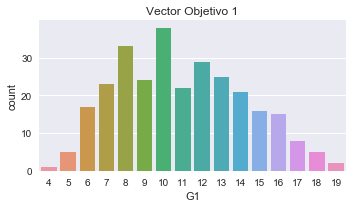

In [339]:
# Visualizo G1
sns.countplot(final_df['G1'])
plt.title('Vector Objetivo 1')
plt.tight_layout()
plt.show()

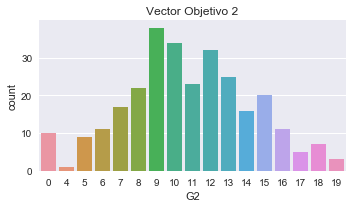

In [340]:
# Visualizo G2
sns.countplot(final_df['G2'])
plt.title('Vector Objetivo 2')
plt.tight_layout()
plt.show()

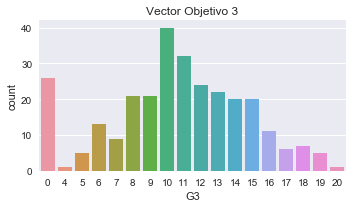

In [341]:
# Visualizo G3
sns.countplot(final_df['G3'])
plt.title('Vector Objetivo 3')
plt.tight_layout()
plt.show()

#### 4. Inspección visual de las variables.

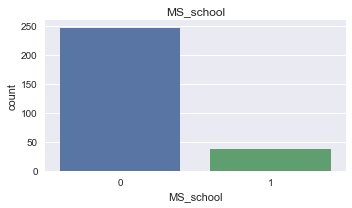

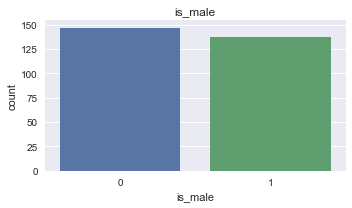

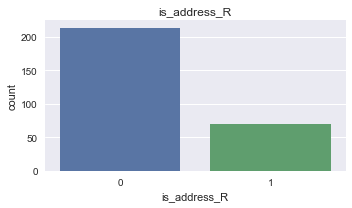

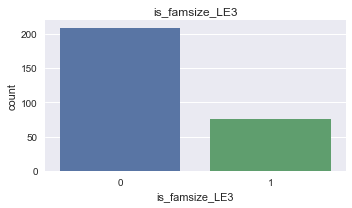

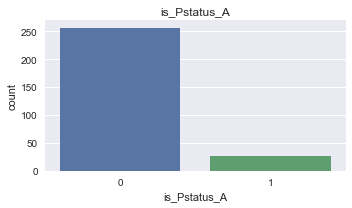

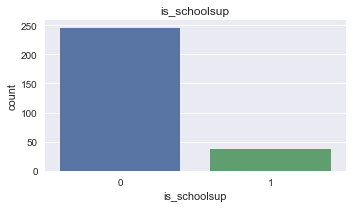

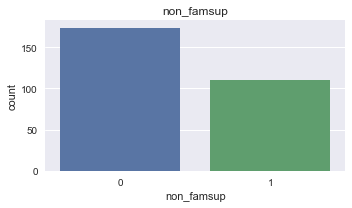

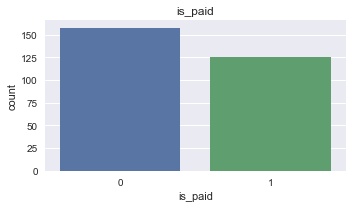

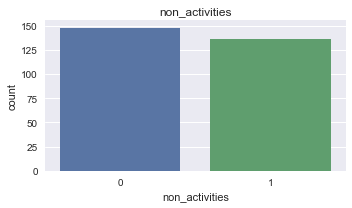

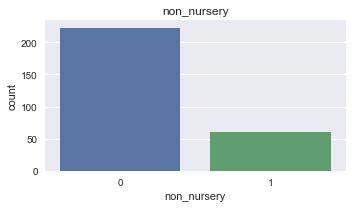

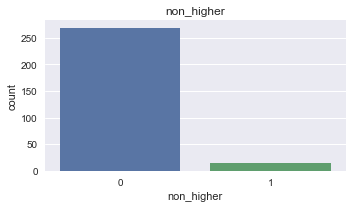

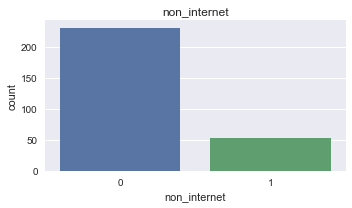

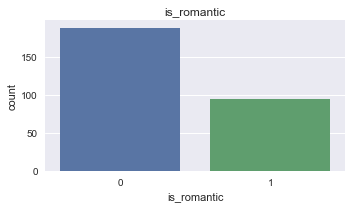

In [342]:
# Inspección de variables binarias
var_bin = ['MS_school', 'is_male','is_address_R', 'is_famsize_LE3', 'is_Pstatus_A', 'is_schoolsup',
       'non_famsup', 'is_paid', 'non_activities', 'non_nursery', 'non_higher',
       'non_internet', 'is_romantic']
for i in var_bin:
    fx.inspeccion_variable(final_df,i)

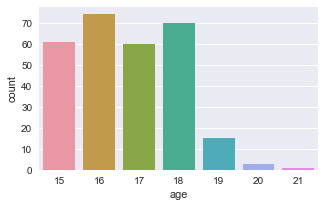

In [343]:
# Inspeccion de variables numéricas
sns.countplot(final_df['age'])

In [344]:
# Inspección de variables nominales 
var_nom

['Mjob', 'Fjob', 'reason', 'guardian']

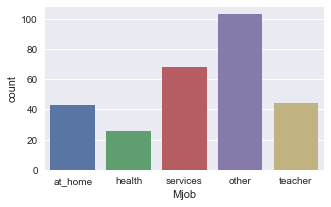

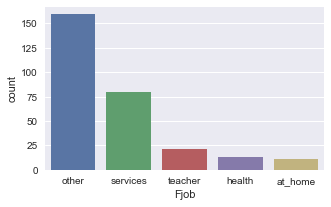

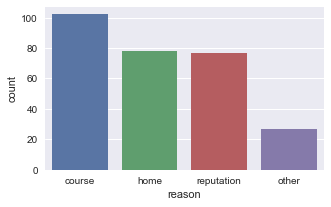

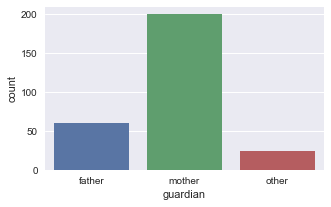

In [345]:
for i in var_nom:
    plt.figure()
    sns.countplot(final_df[i])

In [346]:
# Generamos un dataframe con las variables recodificadas
final_df = final_df.loc[:,['G1', 'G2', 'G3', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime',
                         'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'MS_school', 
                         'is_male', 'is_address_R', 'is_famsize_LE3', 'is_Pstatus_A', 'is_schoolsup',
                         'non_famsup', 'is_paid', 'non_activities', 'non_nursery', 'non_higher',
                         'non_internet', 'is_romantic', 'is_Mjob_health', 'is_Mjob_teacher',
                         'is_Mjob_at_home', 'is_Mjob_services', 'is_Fjob_health','is_Fjob_teacher', 
                         'is_Fjob_at_home', 'is_Fjob_services', 'is_reason_other', 'is_reason_reputation', 
                         'is_reason_home', 'is_guardian_other', 'is_guardian_father']]
final_df.sample(10)

G1  G2  G3  age  Medu  Fedu  traveltime  studytime  failures  famrel  \
87   13  14  14   15     4     2           1          3         0       5   
209   7   7   7   17     4     3           2          3         0       4   
303  17  17  18   17     3     2           1          4         0       5   
286  18  18  19   18     2     2           1          3         0       4   
182  16  17  17   17     2     4           1          2         0       5   
31   17  16  17   15     4     4           2          2         0       4   
361  13  12  12   18     1     1           2          2         1       4   
67    7   7   6   16     3     1           1          4         0       4   
134   9   0   0   15     3     4           4          2         0       5   
245  18  18  18   16     2     1           3          1         0       4   

     ...  is_Mjob_services  is_Fjob_health  is_Fjob_teacher  is_Fjob_at_home  \
87   ...                 0               0                0                0   
209  ...                 0               0                0                0   
303  ...                 0               1                0                0   
286  ...                 0               0                0                1   
182  ...                 1               0                0                0   
31   ...                 1               0                0                0   
361  ...                 0               0                0                0   
67   ...                 1               0                0                0   
134  ...                 0               0                1                0   
245  ...                 0               0                0                0   

     is_Fjob_services  is_reason_other  is_reason_reputation  is_reason_home  \
87                  0                0                     1               0   
209                 0                0                     1               0   
303                 0                0                     1               0   
286                 0                1                     0               0   
182                 1                0                     1               0   
31                  1                0                     1               0   
361                 0                1                     0               0   
67                  0                0                     0               0   
134                 0                0                     0               0   
245                 0                0                     0               0   

     is_guardian_other  is_guardian_father  
87                   0                   0  
209                  0                   0  
303                  0                   1  
286                  0                   0  
182                  0                   1  
31                   0                   0  
361                  0                   0  
67                   0                   0  
134                  0                   0  
245                  0                   0  

[10 rows x 42 columns]

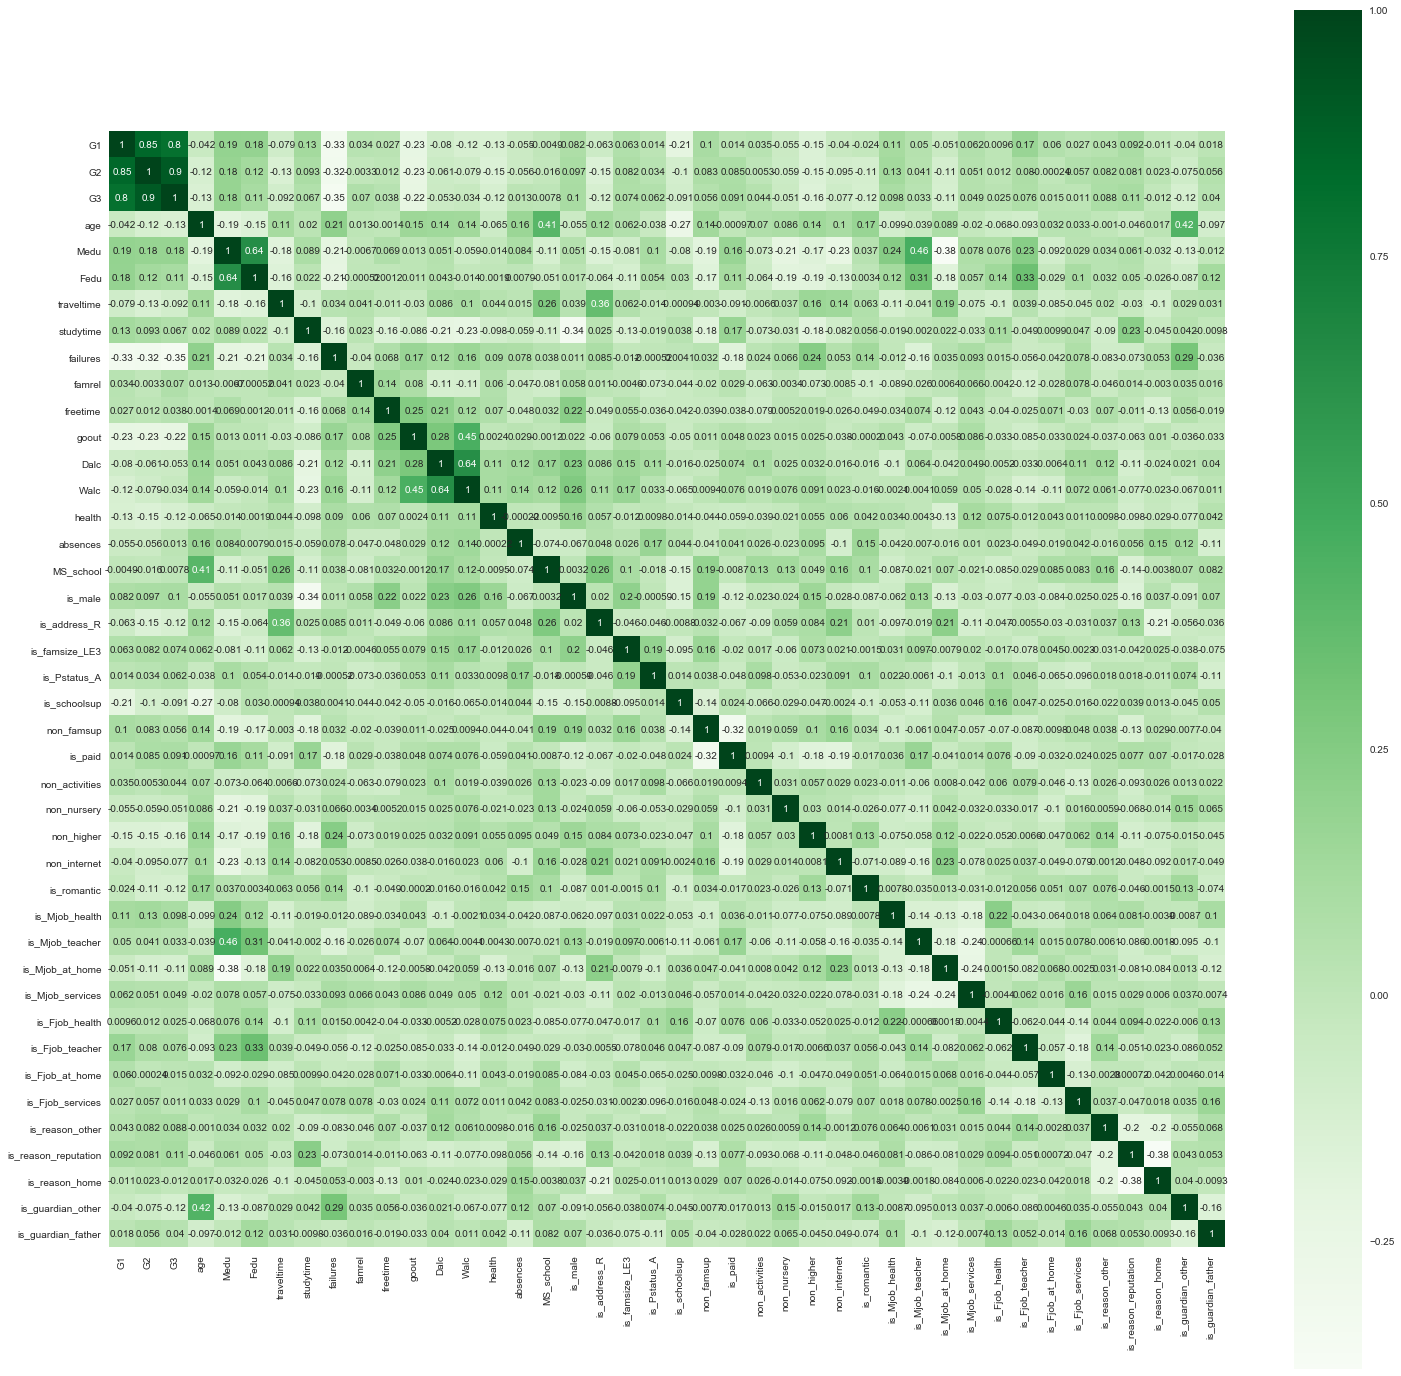

In [347]:
# Generamos un heatmap con las correlaciones de las variables
plt.figure(figsize=(25,25))
sns.heatmap(final_df.corr(), cmap='Greens', annot=True, square=True)

____

### Hito 3

#### Modelación descriptiva.

Se busca determinar cuáles son los principales determinantes para el vector objetivo, lo que nos permitirá refactorizar el modelo para mejorar el desempeño del modelo.

A continuación se construirá un modelo de regresión lineal para cada vector objetivo (G1, G2 y G3) que nos permitirá observar el comportamiento de las variables.

In [348]:
# Ahora estamos en condiciones de generar el modelo con 'ols'

# Importo statsmodels para generar modelos de regresión
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [349]:
final_df.sample(5)

G1  G2  G3  age  Medu  Fedu  traveltime  studytime  failures  famrel  \
69   16  16  16   15     3     1           2          4         0       4   
1     5   5   6   17     1     1           1          2         0       5   
282  12  12  12   18     1     1           2          4         0       5   
238  13  11  11   17     2     1           3          2         0       2   
202   9   9  10   17     1     1           1          2         0       4   

     ...  is_Mjob_services  is_Fjob_health  is_Fjob_teacher  is_Fjob_at_home  \
69   ...                 0               0                0                0   
1    ...                 0               0                0                0   
282  ...                 0               0                0                0   
238  ...                 0               0                0                0   
202  ...                 0               0                0                0   

     is_Fjob_services  is_reason_other  is_reason_reputation  is_reason_home  \
69                  0                0                     1               0   
1                   0                0                     0               0   
282                 0                0                     1               0   
238                 1                0                     0               0   
202                 0                0                     0               0   

     is_guardian_other  is_guardian_father  
69                   0                   1  
1                    0                   1  
282                  0                   0  
238                  0                   0  
202                  0                   0  

[5 rows x 42 columns]

In [350]:
# Para G1
m_G1_ols = smf.ols('G1 ~ MS_school + age + Medu + Fedu + traveltime + studytime + failures + famrel + freetime + goout + Dalc + Walc + health + absences + is_male + is_address_R + is_famsize_LE3 + is_Pstatus_A + is_schoolsup + non_famsup + is_paid + non_activities + non_nursery + non_higher + non_internet + is_romantic + is_Mjob_health + is_Mjob_teacher + is_Mjob_at_home + is_Mjob_services + is_Fjob_health + is_Fjob_teacher + is_Fjob_at_home + is_Fjob_services + is_reason_other + is_reason_reputation + is_reason_home + is_guardian_other + is_guardian_father', final_df).fit()
m_G1_ols.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:                OLS              Adj. R-squared:     0.224    
Dependent Variable:   G1               AIC:                1447.2509
Date:                 2019-07-26 23:46 BIC:                1593.2099
No. Observations:     284              Log-Likelihood:     -683.63  
Df Model:             39               F-statistic:        3.090    
Df Residuals:         244              Prob (F-statistic): 5.75e-08 
R-squared:            0.331            Scale:              8.3997   
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
Intercept             7.8430   3.4068  2.3022 0.0222  1.1326 14.5534
MS_school            -0.3886   0.6664 -0.5832 0.5603 -1.7013  0.9241
age                   0.0772   0.1848  0.4177 0.6765 -0.2869  0.4413
Medu                  0.1809   0.2817  0.6421 0.5214 -0.3740  0.7357
Fedu                  0.1527   0.2362  0.6463 0.5187 -0.3126  0.6179
traveltime           -0.0215   0.2908 -0.0738 0.9412 -0.5943  0.5514
studytime             0.5074   0.2454  2.0678 0.0397  0.0241  0.9907
failures             -1.1235   0.2825 -3.9771 0.0001 -1.6799 -0.5671
famrel                0.1449   0.2129  0.6806 0.4968 -0.2745  0.5643
freetime              0.3778   0.1928  1.9593 0.0512 -0.0020  0.7575
goout                -0.7691   0.1986 -3.8728 0.0001 -1.1603 -0.3779
Dalc                 -0.0730   0.2858 -0.2553 0.7987 -0.6360  0.4901
Walc                  0.1585   0.2098  0.7557 0.4506 -0.2547  0.5718
health               -0.2918   0.1415 -2.0620 0.0403 -0.5705 -0.0131
absences             -0.0048   0.0244 -0.1960 0.8448 -0.0529  0.0433
is_male               0.7631   0.4316  1.7680 0.0783 -0.0871  1.6134
is_address_R         -0.0205   0.4869 -0.0422 0.9664 -0.9797  0.9386
is_famsize_LE3        0.3125   0.4402  0.7099 0.4784 -0.5546  1.1795
is_Pstatus_A          0.1872   0.6504  0.2879 0.7737 -1.0938  1.4683
is_schoolsup         -1.7737   0.5639 -3.1453 0.0019 -2.8845 -0.6629
non_famsup            1.0062   0.4112  2.4468 0.0151  0.1962  1.8161
is_paid               0.0321   0.4030  0.0797 0.9365 -0.7617  0.8260
non_activities        0.4719   0.3700  1.2755 0.2033 -0.2569  1.2007
non_nursery           0.0255   0.4551  0.0560 0.9554 -0.8709  0.9218
non_higher           -1.1077   0.8758 -1.2648 0.2072 -2.8327  0.6174
non_internet         -0.0671   0.5016 -0.1337 0.8937 -1.0550  0.9209
is_romantic          -0.0842   0.3990 -0.2112 0.8329 -0.8701  0.7016
is_Mjob_health        1.5674   0.7903  1.9833 0.0485  0.0107  3.1241
is_Mjob_teacher      -0.5427   0.7033 -0.7717 0.4410 -1.9280  0.8425
is_Mjob_at_home       0.5423   0.5981  0.9067 0.3654 -0.6358  1.7204
is_Mjob_services      0.9336   0.5222  1.7879 0.0750 -0.0950  1.9622
is_Fjob_health        0.4193   0.9520  0.4404 0.6600 -1.4559  2.2945
is_Fjob_teacher       2.2932   0.7956  2.8823 0.0043  0.7261  3.8603
is_Fjob_at_home       1.4765   0.9843  1.5001 0.1349 -0.4623  3.4152
is_Fjob_services      0.6241   0.4706  1.3262 0.1860 -0.3028  1.5511
is_reason_other       0.1005   0.6754  0.1488 0.8819 -1.2300  1.4309
is_reason_reputation  0.5312   0.4873  1.0900 0.2768 -0.4288  1.4911
is_reason_home        0.3701   0.4725  0.7832 0.4343 -0.5607  1.3008
is_guardian_other     0.0880   0.7821  0.1126 0.9105 -1.4525  1.6286
is_guardian_father   -0.2087   0.4786 -0.4360 0.6632 -1.1515  0.7341
--------------------------------------------------------------------
Omnibus:               6.431         Durbin-Watson:            2.003
Prob(Omnibus):         0.040         Jarque-Bera (JB):         4.178
Skew:                  0.128         Prob(JB):                 0.124
Kurtosis:              2.464         Condition No.:            399  
=====================================

__Observacion:__ Para poder mejora el desempeño del modelo, deberemos refactorizarlo considerando las variables que mejor se ajusten al vector objetivo. Para esto consideraremos las variables que tengan un `p-value` inferior a _0.05_ 

Para obtener las variables que cumplen con la significancia estadística del 95% (p-value < 0.05) utilizaremos la función `get_significance_variables` de nuestras funciones personalizadas.

In [351]:
new_var = fx.get_significance_variables(m_G1_ols)
list(new_var)

['Intercept',
 'studytime',
 'failures',
 'goout',
 'health',
 'is_schoolsup',
 'non_famsup',
 'is_Mjob_health',
 'is_Fjob_teacher']

In [352]:
# Generamos el modelo con estas variables
m_G1_ols2 = smf.ols('G1 ~ studytime + failures + goout + health + is_schoolsup + non_famsup + is_Mjob_health + is_Fjob_teacher', final_df).fit()
m_G1_ols2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.228    
Dependent Variable: G1               AIC:                1417.7874
Date:               2019-07-26 23:46 BIC:                1450.6282
No. Observations:   284              Log-Likelihood:     -699.89  
Df Model:           8                F-statistic:        11.42    
Df Residuals:       275              Prob (F-statistic): 5.59e-14 
R-squared:          0.249            Scale:              8.3575   
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          12.7024   0.9254 13.7265 0.0000 10.8807 14.5242
studytime           0.3880   0.2117  1.8328 0.0679 -0.0288  0.8049
failures           -1.2038   0.2422 -4.9707 0.0000 -1.6805 -0.7270
goout              -0.5403   0.1631 -3.3136 0.0010 -0.8613 -0.2193
health             -0.2355   0.1317 -1.7891 0.0747 -0.4947  0.0236
is_schoolsup       -1.9478   0.5113 -3.8099 0.0002 -2.9543 -0.9413
non_famsup          0.8549   0.3660  2.3354 0.0202  0.1343  1.5755
is_Mjob_health      1.4750   0.6013  2.4530 0.0148  0.2912  2.6587
is_Fjob_teacher     2.0756   0.6643  3.1246 0.0020  0.7679  3.3834
------------------------------------------------------------------
Omnibus:               9.975        Durbin-Watson:           1.996
Prob(Omnibus):         0.007        Jarque-Bera (JB):        5.403
Skew:                  0.121        Prob(JB):                0.067
Kurtosis:              2.369        Condition No.:           31   
==================================================================

"""

__Comentarios:__ Se puede observar un autmento en F-statistics y una disminución en Prob(F-statistic). Esto evidencia la significancia estadística del modelo.

Además podemos observar la influencia de las variables en el vector objetivo en el siguiente orden:
* `is_Fjob_teacher`: Cuando la ocupación del padre es profesor
* `is_schoolsup`: Existe apoyo educacional del colegio (afecta negativamente)
* `is_Mjob_health`: Cuando la ocupación de la madre está relacionada con la salud
* `failures`: Cantidad de clases reprobadas (afecta negativamente)
* `non_famsup`: Cuando no hay apoyo educacional de la familia
* `goout`: Salidas con amigos (afecta negativamente)
* `studytime`: Horas semanales dedicadas al estudio
* `health`: Estado de salud actual

In [353]:
# Para G2
m_G2_ols = smf.ols('G2 ~ MS_school + age + Medu + Fedu + traveltime + studytime + failures + famrel + freetime + goout + Dalc + Walc + health + absences + is_male + is_address_R + is_famsize_LE3 + is_Pstatus_A + is_schoolsup + non_famsup + is_paid + non_activities + non_nursery + non_higher + non_internet + is_romantic + is_Mjob_health + is_Mjob_teacher + is_Mjob_at_home + is_Mjob_services + is_Fjob_health + is_Fjob_teacher + is_Fjob_at_home + is_Fjob_services + is_reason_other + is_reason_reputation + is_reason_home + is_guardian_other + is_guardian_father', final_df).fit()
m_G2_ols.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:                OLS              Adj. R-squared:     0.189    
Dependent Variable:   G2               AIC:                1539.9558
Date:                 2019-07-26 23:46 BIC:                1685.9148
No. Observations:     284              Log-Likelihood:     -729.98  
Df Model:             39               F-statistic:        2.693    
Df Residuals:         244              Prob (F-statistic): 2.14e-06 
R-squared:            0.301            Scale:              11.642   
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
Intercept            12.3320   4.0107  3.0748 0.0023  4.4320 20.2321
MS_school             0.2397   0.7846  0.3054 0.7603 -1.3058  1.7851
age                  -0.0696   0.2176 -0.3199 0.7493 -0.4982  0.3590
Medu                  0.3221   0.3316  0.9712 0.3324 -0.3311  0.9753
Fedu                 -0.1232   0.2781 -0.4430 0.6581 -0.6710  0.4246
traveltime           -0.2211   0.3424 -0.6458 0.5190 -0.8955  0.4533
studytime             0.4171   0.2889  1.4439 0.1500 -0.1519  0.9861
failures             -1.1293   0.3326 -3.3956 0.0008 -1.7844 -0.4742
famrel                0.0282   0.2507  0.1124 0.9106 -0.4655  0.5219
freetime              0.3319   0.2270  1.4624 0.1449 -0.1152  0.7790
goout                -0.9655   0.2338 -4.1297 0.0000 -1.4261 -0.5050
Dalc                 -0.2099   0.3365 -0.6239 0.5333 -0.8728  0.4529
Walc                  0.3593   0.2470  1.4546 0.1471 -0.1272  0.8457
health               -0.3901   0.1666 -2.3416 0.0200 -0.7183 -0.0620
absences             -0.0079   0.0287 -0.2737 0.7846 -0.0645  0.0487
is_male               0.8885   0.5082  1.7484 0.0817 -0.1125  1.8895
is_address_R         -0.7540   0.5733 -1.3152 0.1897 -1.8831  0.3752
is_famsize_LE3        0.4639   0.5182  0.8951 0.3716 -0.5569  1.4846
is_Pstatus_A          0.5952   0.7657  0.7774 0.4377 -0.9130  2.1034
is_schoolsup         -1.0396   0.6639 -1.5659 0.1187 -2.3474  0.2681
non_famsup            1.0023   0.4841  2.0705 0.0395  0.0488  1.9559
is_paid               0.4781   0.4745  1.0075 0.3147 -0.4565  1.4127
non_activities        0.2109   0.4356  0.4841 0.6287 -0.6471  1.0689
non_nursery          -0.1439   0.5357 -0.2685 0.7885 -1.1991  0.9114
non_higher           -1.1094   1.0310 -1.0760 0.2830 -3.1402  0.9215
non_internet         -0.4415   0.5905 -0.7477 0.4553 -1.6046  0.7216
is_romantic          -0.7324   0.4697 -1.5593 0.1202 -1.6577  0.1928
is_Mjob_health        1.3481   0.9304  1.4490 0.1486 -0.4845  3.1808
is_Mjob_teacher      -0.9147   0.8279 -1.1048 0.2703 -2.5456  0.7161
is_Mjob_at_home       0.0448   0.7041  0.0636 0.9493 -1.3422  1.4317
is_Mjob_services      0.5723   0.6148  0.9310 0.3528 -0.6386  1.7833
is_Fjob_health        0.2775   1.1208  0.2476 0.8047 -1.9301  2.4851
is_Fjob_teacher       1.6963   0.9367  1.8110 0.0714 -0.1486  3.5413
is_Fjob_at_home       0.6572   1.1588  0.5672 0.5711 -1.6252  2.9397
is_Fjob_services      0.9032   0.5540  1.6302 0.1044 -0.1881  1.9944
is_reason_other       0.7999   0.7952  1.0059 0.3155 -0.7664  2.3662
is_reason_reputation  0.6478   0.5737  1.1290 0.2600 -0.4824  1.7779
is_reason_home        0.4672   0.5563  0.8398 0.4018 -0.6286  1.5630
is_guardian_other    -0.0022   0.9208 -0.0024 0.9981 -1.8159  1.8114
is_guardian_father   -0.0425   0.5635 -0.0755 0.9399 -1.1525  1.0674
--------------------------------------------------------------------
Omnibus:               12.830        Durbin-Watson:           1.773 
Prob(Omnibus):         0.002         Jarque-Bera (JB):        14.472
Skew:                  -0.426        Prob(JB):                0.001 
Kurtosis:              3.705         Condition No.:           399   
=====================================

In [354]:
# Hacemos lo mismo que para G1
new_var2 = fx.get_significance_variables(m_G2_ols)
list(new_var2)

['Intercept', 'failures', 'goout', 'health', 'non_famsup']

In [355]:
# Refactorizamos el modelo con estas variables
m_G2_ols2 = smf.ols('G2 ~ failures + goout + health + non_famsup', final_df).fit()
m_G2_ols2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.149    
Dependent Variable: G2               AIC:                1521.9059
Date:               2019-07-26 23:46 BIC:                1540.1508
No. Observations:   284              Log-Likelihood:     -755.95  
Df Model:           4                F-statistic:        13.34    
Df Residuals:       279              Prob (F-statistic): 5.80e-10 
R-squared:          0.161            Scale:              12.225   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      14.1581    0.8718  16.2403  0.0000  12.4420  15.8742
failures       -1.4703    0.2897  -5.0755  0.0000  -2.0406  -0.9001
goout          -0.6521    0.1958  -3.3302  0.0010  -1.0375  -0.2666
health         -0.3533    0.1584  -2.2310  0.0265  -0.6651  -0.0416
non_famsup      0.6903    0.4266   1.6182  0.1068  -0.1494   1.5301
------------------------------------------------------------------
Omnibus:               13.249       Durbin-Watson:          1.819 
Prob(Omnibus):         0.001        Jarque-Bera (JB):       14.707
Skew:                  -0.446       Prob(JB):               0.001 
Kurtosis:              3.669        Condition No.:          22    
==================================================================

"""

__Comentarios:__ Se puede observar un aumento en F-statistics y una disminución en Prob(F-statistic). Esto evidencia la significancia estadística del modelo.

Además podemos observar la influencia de las variables en el vector objetivo en el siguiente orden:
* `failures`: Cantidad de clases reprobadas (de forma negativa)
* `non_famsup`: No tiene apoyo educacional de la familia
* `goout`: Salidas con amigos (de forma negativa)
* `health`: Estado de salud actual (de forma negativa)

In [356]:
# Para G3
m_G3_ols = smf.ols('G3 ~ MS_school + age + Medu + Fedu + traveltime + studytime + failures + famrel + freetime + goout + Dalc + Walc + health + absences + is_male + is_address_R + is_famsize_LE3 + is_Pstatus_A + is_schoolsup + non_famsup + is_paid + non_activities + non_nursery + non_higher + non_internet + is_romantic + is_Mjob_health + is_Mjob_teacher + is_Mjob_at_home + is_Mjob_services + is_Fjob_health + is_Fjob_teacher + is_Fjob_at_home + is_Fjob_services + is_reason_other + is_reason_reputation + is_reason_home + is_guardian_other + is_guardian_father', final_df).fit()
m_G3_ols.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:                OLS              Adj. R-squared:     0.201    
Dependent Variable:   G3               AIC:                1641.5264
Date:                 2019-07-26 23:46 BIC:                1787.4854
No. Observations:     284              Log-Likelihood:     -780.76  
Df Model:             39               F-statistic:        2.831    
Df Residuals:         244              Prob (F-statistic): 6.14e-07 
R-squared:            0.312            Scale:              16.648   
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
Intercept            11.5320   4.7961  2.4045 0.0169  2.0850 20.9790
MS_school             0.9206   0.9382  0.9812 0.3275 -0.9275  2.7686
age                  -0.1608   0.2602 -0.6179 0.5372 -0.6733  0.3517
Medu                  0.5017   0.3966  1.2650 0.2071 -0.2794  1.2827
Fedu                 -0.3060   0.3325 -0.9203 0.3583 -0.9611  0.3490
traveltime           -0.1333   0.4094 -0.3256 0.7450 -0.9398  0.6732
studytime             0.3779   0.3454  1.0941 0.2750 -0.3025  1.0583
failures             -1.4767   0.3977 -3.7131 0.0003 -2.2600 -0.6933
famrel                0.4857   0.2997  1.6206 0.1064 -0.1047  1.0761
freetime              0.4721   0.2714  1.7392 0.0833 -0.0626  1.0067
goout                -1.2396   0.2796 -4.4337 0.0000 -1.7903 -0.6889
Dalc                 -0.5493   0.4024 -1.3649 0.1735 -1.3419  0.2434
Walc                  0.7566   0.2953  2.5616 0.0110  0.1748  1.3383
health               -0.3936   0.1992 -1.9759 0.0493 -0.7861 -0.0012
absences              0.0336   0.0344  0.9774 0.3293 -0.0341  0.1013
is_male               1.0108   0.6077  1.6634 0.0975 -0.1862  2.2077
is_address_R         -0.8873   0.6855 -1.2943 0.1968 -2.2376  0.4630
is_famsize_LE3        0.3597   0.6197  0.5804 0.5622 -0.8610  1.5803
is_Pstatus_A          1.0103   0.9156  1.1035 0.2709 -0.7932  2.8139
is_schoolsup         -1.0615   0.7939 -1.3371 0.1824 -2.6253  0.5023
non_famsup            0.9381   0.5789  1.6205 0.1064 -0.2022  2.0784
is_paid               0.5265   0.5674  0.9279 0.3544 -0.5911  1.6441
non_activities        0.6244   0.5209  1.1987 0.2318 -0.4016  1.6503
non_nursery          -0.0846   0.6406 -0.1321 0.8950 -1.3465  1.1772
non_higher           -1.7295   1.2329 -1.4027 0.1620 -4.1580  0.6990
non_internet         -0.4170   0.7061 -0.5905 0.5554 -1.8079  0.9739
is_romantic          -0.8878   0.5617 -1.5807 0.1153 -1.9942  0.2185
is_Mjob_health        1.0952   1.1126  0.9843 0.3259 -1.0964  3.2867
is_Mjob_teacher      -1.3098   0.9901 -1.3230 0.1871 -3.2600  0.6403
is_Mjob_at_home      -0.2651   0.8420 -0.3149 0.7531 -1.9236  1.3934
is_Mjob_services      0.4771   0.7352  0.6489 0.5170 -0.9710  1.9251
is_Fjob_health        0.7621   1.3402  0.5687 0.5701 -1.8777  3.4020
is_Fjob_teacher       2.1982   1.1201  1.9625 0.0508 -0.0081  4.4044
is_Fjob_at_home       1.4023   1.3857  1.0120 0.3125 -1.3271  4.1317
is_Fjob_services      0.8480   0.6625  1.2800 0.2018 -0.4569  2.1530
is_reason_other       0.9620   0.9509  1.0117 0.3127 -0.9110  2.8351
is_reason_reputation  0.9431   0.6861  1.3746 0.1705 -0.4083  2.2945
is_reason_home        0.2428   0.6652  0.3650 0.7154 -1.0675  1.5532
is_guardian_other    -0.6460   1.1011 -0.5867 0.5580 -2.8148  1.5228
is_guardian_father   -0.2893   0.6738 -0.4293 0.6681 -1.6165  1.0380
--------------------------------------------------------------------
Omnibus:               12.840        Durbin-Watson:           1.821 
Prob(Omnibus):         0.002         Jarque-Bera (JB):        13.547
Skew:                  -0.533        Prob(JB):                0.001 
Kurtosis:              3.085         Condition No.:           399   
=====================================

In [357]:
# Utilizamos solamente las variables que tengan significancia estadistica al 95%
new_var3 = fx.get_significance_variables(m_G3_ols)
list(new_var3)

['Intercept', 'failures', 'goout', 'Walc', 'health']

__Comentario:__ Para inspeccionar el comportamiento de los principales determinantes graficaremos la correlación entre estos y la variable dependiente.

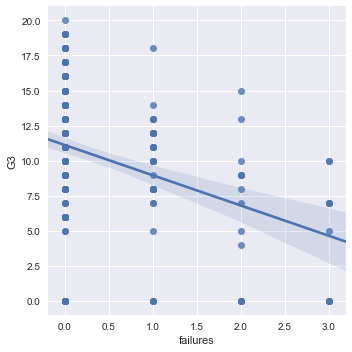

In [358]:
sns.lmplot(x='failures', y='G3', data=final_df)

__Comentario:__ Se ve que existe una relación entre la cantidad de clases reprobadas afectando negativamente al promedio final.

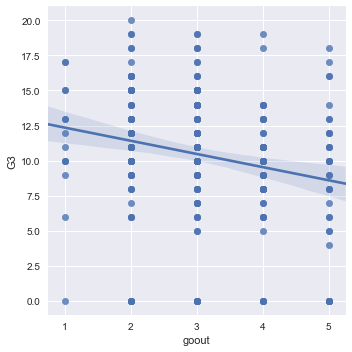

In [359]:
sns.lmplot(x='goout', y='G3', data=final_df)

__Comentario:__ Se ve que hay una relación entre las salidas con amigos de forma negativa con el promedio final.

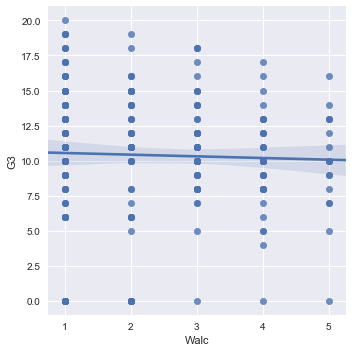

In [360]:
sns.lmplot(x='Walc', y='G3', data=final_df)

__Comentarios:__ Si bien hay una relación, no es tan fuerte respecto al consumo de alcohol los fines de semana respecto al promedio final.

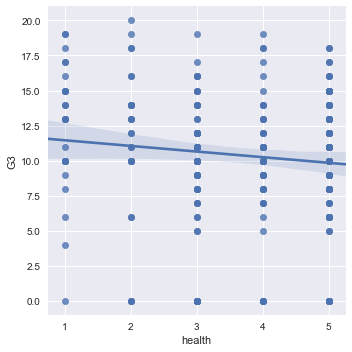

In [361]:
sns.lmplot(x='health', y='G3', data=final_df)

__Comentario:__ Sorprendentemente hay una relación negativa entre un buen estado de salud y el promedio final.

In [362]:
# Refactorizamos el modelo con estas variables
m_G3_ols2 = smf.ols('G3 ~ failures + goout + Walc + health', final_df).fit()
m_G3_ols2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.156    
Dependent Variable: G3               AIC:                1625.2739
Date:               2019-07-26 23:46 BIC:                1643.5188
No. Observations:   284              Log-Likelihood:     -807.64  
Df Model:           4                F-statistic:        14.09    
Df Residuals:       279              Prob (F-statistic): 1.74e-10 
R-squared:          0.168            Scale:              17.592   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      14.2740    1.0230  13.9527  0.0000  12.2601  16.2878
failures       -1.9922    0.3484  -5.7173  0.0000  -2.6781  -1.3063
goout          -0.9641    0.2618  -3.6829  0.0003  -1.4794  -0.4488
Walc            0.4610    0.2198   2.0972  0.0369   0.0283   0.8937
health         -0.3507    0.1910  -1.8358  0.0675  -0.7267   0.0254
------------------------------------------------------------------
Omnibus:               18.452       Durbin-Watson:          1.901 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       20.182
Skew:                  -0.609       Prob(JB):               0.000 
Kurtosis:              3.473        Condition No.:          23    
==================================================================

"""

__Comentarios:__ Se puede observar un autmento en F-statistics y una disminución en Prob(F-statistic). Esto evidencia la significancia estadística del modelo.

Además podemos observar la influencia de las variables en el vector objetivo en el siguiente orden:
* `failures`: Cantidad de clases reprobadas (de forma negativa)
* `goout`: Salidas con amigos (de forma negativa)
* `Walc`: Consumo de alcohol en fines de semana
* `health`: Estado de salud actual (de forma negativa)

__Comentarios:__ Para comenzar a entrenar el modelo generaremos tres distintos: uno saturado con todas las variables, uno con las variables con significancia estadística al 95% y otro modificando los hiperparámetros.

____
### Hito 4

#### Modelación predictiva

A continuación se implementará una solución analítica que aumente las métricas de desempeño. Se generarán tres modelos predictivos para G3.

##### Modelo 1
Este modelo lo realizaremos con todas las varibales.

In [363]:
# Importo Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [364]:
final_df.head()

G1  G2  G3  age  Medu  Fedu  traveltime  studytime  failures  famrel  ...  \
1   5   5   6   17     1     1           1          2         0       5  ...   
3  15  14  15   15     4     2           1          3         0       3  ...   
5  15  15  15   16     4     3           1          2         0       5  ...   
6  12  12  11   16     2     2           1          2         0       4  ...   
7   6   5   6   17     4     4           2          2         0       4  ...   

   is_Mjob_services  is_Fjob_health  is_Fjob_teacher  is_Fjob_at_home  \
1                 0               0                0                0   
3                 0               0                0                0   
5                 1               0                0                0   
6                 0               0                0                0   
7                 0               0                1                0   

   is_Fjob_services  is_reason_other  is_reason_reputation  is_reason_home  \
1                 0                0                     0               0   
3                 1                0                     0               1   
5                 0                0                     1               0   
6                 0                0                     0               1   
7                 0                0                     0               1   

   is_guardian_other  is_guardian_father  
1                  0                   1  
3                  0                   0  
5                  0                   0  
6                  0                   0  
7                  0                   0  

[5 rows x 42 columns]

In [365]:
# Primero genero un dataframe sin el vector objetivo
new_df = final_df.loc[:,'age':'is_guardian_father']
new_df.sample(5)

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
346   18     4     3           1          3         0       5         3   
191   17     1     1           1          2         0       5         3   
318   17     3     4           1          3         0       4         3   
332   18     3     3           1          2         0       5         3   
281   17     3     2           1          1         1       4         4   

     goout  Dalc  ...  is_Mjob_services  is_Fjob_health  is_Fjob_teacher  \
346      2     1  ...                 0               0                0   
191      3     1  ...                 0               0                0   
318      4     2  ...                 0               0                0   
332      4     1  ...                 1               0                0   
281      4     3  ...                 0               0                0   

     is_Fjob_at_home  is_Fjob_services  is_reason_other  is_reason_reputation  \
346                0                 1                0                     0   
191                0                 1                0                     0   
318                0                 1                0                     0   
332                0                 1                0                     0   
281                0                 1                0                     0   

     is_reason_home  is_guardian_other  is_guardian_father  
346               0                  0                   0  
191               0                  0                   0  
318               0                  0                   1  
332               1                  0                   0  
281               1                  0                   0  

[5 rows x 39 columns]

In [366]:
# Genero los subconjuntos de entrenamiento
X_train1, X_test1, y_train1, y_test1 = train_test_split(new_df,
                                                   final_df['G3'],
                                                   test_size=.33,
                                                   random_state=16254)

In [367]:
# Implemento el modelo 
def_model1 = LogisticRegression().fit(X_train1, y_train1)

In [368]:
# Los coeficientes de cada variable
def_model1.coef_

array([[ 9.65011449e-02, -2.11515208e-01,  3.38688752e-01,
         5.41226483e-01,  2.00380296e-01,  1.30569285e+00,
        -9.49649438e-01, -4.19737221e-01,  9.09183388e-01,
         2.31671152e-01, -8.12471385e-01, -1.37085525e-01,
        -1.63046396e+00, -7.50946752e-01,  2.21631764e-01,
         2.75002740e-01, -4.37608452e-01, -1.66521962e-01,
        -2.49045310e-01, -5.01409241e-01, -5.51009584e-01,
        -4.86870429e-01,  7.98540521e-02,  1.73039185e-01,
         6.92163953e-02,  5.15607246e-01,  8.06091533e-02,
         3.78978398e-01,  4.99769459e-01, -1.21066914e-01,
        -1.07452982e-01,  1.53946529e-01, -5.24913997e-03,
         9.27858128e-02, -4.68640989e-01, -5.65954848e-01,
         4.56525016e-01,  9.01921599e-01, -4.19270544e-01],
       [-3.77320423e-01,  1.90782649e-01, -1.75916015e-02,
        -1.19979076e-01, -4.89260586e-03,  5.78563475e-01,
        -3.95099455e-01,  1.04642929e-01,  4.16344115e-01,
         2.30513566e-02,  2.29781319e-01, -8.54080444e-

In [369]:
def_model1.intercept_

array([-0.14173437, -0.04062475,  0.00336353,  0.02942008, -0.16173699,
       -0.30593841, -0.24568607, -0.10144773, -0.07345553, -0.09810202,
       -0.16492997, -0.22374494,  0.14753836, -0.06475919, -0.05766431,
       -0.00216403, -0.07750202, -0.00594116])

In [370]:
# Genero las predicciones de clases
yhat1 = def_model1.predict(X_test1)
yhat1

array([ 0,  0, 10, 12,  9, 14,  0, 15, 13, 13, 13,  0, 10, 11,  9, 14, 12,
       10, 15, 10,  0, 12,  8,  0,  6, 10, 10, 15,  9, 11, 13, 18,  9, 15,
        7, 13,  0, 13,  8, 10, 12, 11, 15, 13,  8, 15,  8, 15, 11,  0,  8,
       14,  0, 14, 12, 13, 11,  0, 13,  0, 13, 14, 11,  9,  9,  8, 11, 15,
        8, 10, 10, 10,  8, 10, 13, 13, 12, 11, 10, 11, 14, 11, 11,  0, 10,
       14,  6, 10, 11,  8,  8,  8, 11, 11])

In [371]:
# Calculamos Error Cuadratico Medio y R2
model1_mse = mean_squared_error(y_test1, yhat1).round(1)
model1_r2 = r2_score(y_test1, yhat1)

In [372]:
print(f"MES: {model1_mse}\nR2: {model1_r2}")

MES: 25.8
R2: -0.2250801437208203


__Comentarios:__ Se obtuvo un R2 menor a 0, lo que nos sugiere que nuestro modelo tiene peor desempeño que el promedio aleatorio. A continuación generaremos un modelo refactorizado con las variables con significancia estadística del 95%.

##### Modelo 2
Utilizaremos las variables con signicifancia estadística con un `p-value < 0.05`.

In [373]:
# Primero genero un dataframe con estas variables
new_df2 = final_df.loc[:,['failures', 'goout', 'Walc', 'health']]
new_df2.sample(5)

failures  goout  Walc  health
379         0      4     3       1
314         2      2     1       3
287         0      3     1       3
243         0      2     2       5
202         0      4     3       1

In [374]:
# Genero los subconjuntos de entrenamiento
X_train2, X_test2, y_train2, y_test2 = train_test_split(new_df2,
                                                   final_df['G3'],
                                                   test_size=.33,
                                                   random_state=16254)

In [375]:
# Implemento el modelo 
def_model2 = LogisticRegression().fit(X_train2, y_train2)

In [376]:
# Los coeficientes de cada variable
def_model2.coef_

array([[ 1.09123404,  0.0612771 , -0.70688324, -0.10968628],
       [ 0.95569727, -0.345183  ,  0.21989034, -1.60474659],
       [ 0.81095686, -0.52061354,  0.41839957, -0.53761787],
       [-0.69388129, -0.06461302, -0.45023878, -0.25167664],
       [ 0.87787266, -0.72303307,  0.12452019, -0.2523521 ],
       [ 0.16098136, -0.03635161,  0.2193631 , -0.06997438],
       [-0.40272227, -0.17445403,  0.06237444, -0.15072115],
       [-0.24122979, -0.18415347,  0.35811357, -0.3271804 ],
       [-0.589575  , -0.0367722 , -0.11458557,  0.01737794],
       [-0.21308722, -0.29629962,  0.01431515, -0.18378936],
       [-0.25681206, -0.31087673,  0.17334193, -0.1474507 ],
       [-0.87474934, -0.09685964, -0.45365063, -0.11066547],
       [-0.28976158, -0.71572493, -0.10093675, -0.02947031],
       [-0.35851866, -0.92325684, -0.11590896, -0.19174579],
       [-0.37740558, -1.16826817, -0.35883116,  0.07358819],
       [-0.24394921, -0.41410271,  0.36963018, -1.29224637],
       [-0.34208899, -0.

In [377]:
def_model2.intercept_

array([-1.11736036, -0.62147948, -1.74675295, -0.97479146, -1.03336317,
       -2.33815773, -1.35154164, -0.97181379, -1.63344605, -0.72956119,
       -1.13033937, -0.85757432,  0.01770174, -0.57451914, -0.61556727,
       -0.46946079, -0.30528102, -0.14002802])

In [378]:
# Genero las predicciones de clases
yhat2 = def_model2.predict(X_test2)
yhat2

array([ 8, 11,  0, 10,  8, 11,  0,  7,  0, 11, 15,  0, 10, 15, 10, 11, 10,
        0,  0, 10, 11, 15, 10,  0, 10, 10, 11, 15, 15, 15,  0, 10, 10, 11,
        0, 10, 15,  0, 10, 10, 11, 11, 11,  0,  0, 15,  8, 15, 15, 11,  8,
       11, 11,  0, 10, 15, 11, 11,  8, 11, 10, 15,  0, 10, 10,  8, 15, 10,
       15, 10, 10, 10, 10, 11, 10, 11, 10, 11, 10,  0, 10, 11, 10,  0, 10,
       15, 15, 10, 10, 10, 10,  8, 11, 11])

In [379]:
# Calculamos Error Cuadratico Medio y R2
model2_mse = mean_squared_error(y_test2, yhat2).round(1)
model2_r2 = r2_score(y_test2, yhat2)

In [380]:
print(f"MES: {model2_mse}\nR2: {model2_r2}")

MES: 34.0
R2: -0.6154069579810237


__Comentarios:__ Obtenemos resultados similares al anterior modelo en R2 pero un mejor MSE. Ahora, generaremos un tercer modelo ajustando los hiperparámetros.

##### Modelo 3
Generaremos otro modelo modificando los hiperparámetros.

In [381]:
# Primero genero un dataframe con las variables con p_value < 0.05
new_df3 = final_df.loc[:,['failures', 'goout', 'Walc', 'health']]
new_df3.sample(5)

failures  goout  Walc  health
52          1      5     4       5
7           0      4     1       1
100         0      5     5       4
394         0      3     3       5
177         0      4     4       4

In [382]:
# Genero los subconjuntos de entrenamiento
X_train3, X_test3, y_train3, y_test3 = train_test_split(new_df3,
                                                   final_df['G3'],
                                                   test_size=.33,
                                                   random_state=16254)

In [383]:
# Implemento el modelo 
def_model3 = LogisticRegression(C=2.0, fit_intercept=False).fit(X_train3, y_train3)

In [384]:
# Los coeficientes de cada variable
def_model3.coef_

array([[ 1.20533841, -0.11843582, -0.76658662, -0.25187172],
       [ 1.38681947, -0.47362568,  0.33580967, -2.16355308],
       [ 0.99685988, -0.9305148 ,  0.49895033, -0.81197712],
       [-0.91711566, -0.23149565, -0.52703591, -0.35641285],
       [ 0.988731  , -0.97126782,  0.16512824, -0.40081026],
       [ 0.2977841 , -0.44568954,  0.21434724, -0.36015455],
       [-0.37587071, -0.42350072,  0.04703835, -0.31287532],
       [-0.1861873 , -0.36938125,  0.36225419, -0.4441267 ],
       [-0.58211336, -0.31326704, -0.14747123, -0.17904588],
       [-0.19501954, -0.43452923,  0.00874635, -0.27243351],
       [-0.2149728 , -0.52151722,  0.16866304, -0.286983  ],
       [-1.13911546, -0.23962456, -0.51168389, -0.2041491 ],
       [-0.3217535 , -0.72905199, -0.0937216 , -0.01955467],
       [-0.51522384, -1.12283446, -0.09893508, -0.2347515 ],
       [-0.56162669, -1.42105695, -0.38258041,  0.05627815],
       [-0.35618108, -0.54752696,  0.52879837, -1.55906877],
       [-0.50271308, -0.

In [385]:
def_model2.intercept_

array([-1.11736036, -0.62147948, -1.74675295, -0.97479146, -1.03336317,
       -2.33815773, -1.35154164, -0.97181379, -1.63344605, -0.72956119,
       -1.13033937, -0.85757432,  0.01770174, -0.57451914, -0.61556727,
       -0.46946079, -0.30528102, -0.14002802])

In [386]:
# Genero las predicciones de clases
yhat3 = def_model3.predict(X_test3)
yhat3

array([ 8, 11,  0, 10, 10, 11,  0,  7,  0, 10, 15,  0, 10, 15, 10, 11, 10,
        0,  0, 10, 11, 11, 10,  0,  8, 10, 11, 15, 15, 11,  0, 10, 10, 11,
        0,  8, 11,  0, 10, 10, 11, 11, 11,  0,  0, 15, 10, 15, 15, 11,  8,
       11, 11,  0, 10, 11, 11, 11,  8,  0, 10, 15,  0, 10, 10,  8, 11, 10,
       15,  8, 10, 10, 10, 11, 10, 11, 10, 11, 10,  0, 11, 11, 10,  0, 10,
       15, 11, 10, 10, 10, 10, 10, 10, 11])

In [387]:
# Calculamos Error Cuadratico Medio y R2
model3_mse = mean_squared_error(y_test3, yhat3).round(1)
model3_r2 = r2_score(y_test3, yhat3)

In [388]:
print(f"MES: {model3_mse}\nR2: {model3_r2}")

MES: 32.2
R2: -0.5324877901848146


__Resultados:__ Ahora compararemos los resultados de los tres modelos.

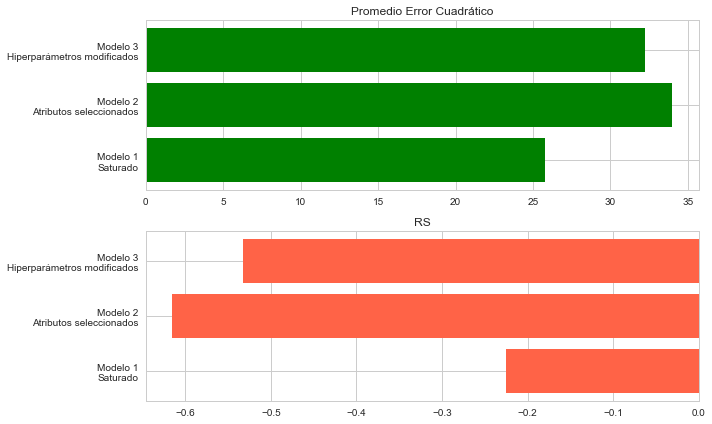

In [389]:
labels = ['Modelo 1\nSaturado', 'Modelo 2\nAtributos seleccionados', 'Modelo 3\nHiperparámetros modificados']

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

plt.subplot(2,1,1)
plt.barh(labels, [model1_mse, model2_mse, model3_mse], color='green')
plt.title('Promedio Error Cuadrático')

plt.subplot(2,1,2)
plt.barh(labels, [model1_r2, model2_r2, model3_r2], color='tomato')
plt.title('RS')

plt.tight_layout()

__Conclusión:__ Si bien el R2 se negativo en los tres casos, esto puede darse por la poca cantidad de datos y la gran cantidad de variables. Además esto nos indica que no necesariamente hay una relación lineal. Dado esto, consideraremos el modelo 1, el cual presenta el MSE más bajo respecto a los demás.

#### Dimensionalidad

Se pide analizar las variables asociadas a aspectos ambientales del alumno para encontrar categorías latentes.

In [390]:
# Importamos la libreria de analisis factorial
import factor_analyzer as factor

In [391]:
# Primero separamos estas variables en un nuevo dataframe
trust_df = final_df.loc[:,['famrel','freetime','goout','Dalc','Walc', 'health']]
trust_df.sample(5)

famrel  freetime  goout  Dalc  Walc  health
139       4         3      2     1     1       5
364       3         2      2     1     2       3
181       4         2      3     1     2       3
377       5         4      3     3     4       2
361       4         4      3     2     3       5

In [392]:
# Ya que todas van de 1 a 5, graficaremos los promedios
variable, mean = [],[]

for colname, serie in trust_df.iteritems():
    # guardamos el nombre en variable 
    variable.append(colname)
    # calculamos y procesamos la media 
    mean.append(serie.mean())

tmp_df = pd.DataFrame({'var':variable, 'mean':mean}).sort_values(by=['mean'])

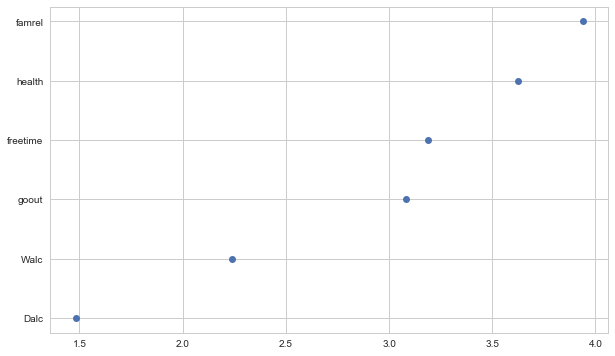

In [393]:
plt.plot(tmp_df['mean'], tmp_df['var'],'o')

Ahora aplicaremos la prueba de esferacidad de errores de Bartlett, la que nos indicará si la matriz de correlaciones corresponde a una matriz de identidad.

In [394]:
factor.calculate_bartlett_sphericity(trust_df)

(264.4978629665067, 6.03816710126852e-48)

Valores menores al .05 (en el segúndo valor) van a indicar evidencia en contra de la hipótesis nula, que esta matriz es una matriz de indentidad. Para continuar con el análisis, realizaremos la prueba de muestreo Kaiser-Meyer-Olkin (KMO), con la cual podemos medir si las correlaciones parciales dentro de la matriz son cercanas a 0, lo cual nos inficará que existe al menos un factor latente.

In [395]:
factor.calculate_kmo(trust_df)

(array([0.50173343, 0.57692329, 0.61683967, 0.58664172, 0.5554092 ,
        0.59265861]), 0.5767240731164592)

Se sugiere que para seguir con el análisis factorial, el KMO debe entregar valores superiores a _.7_. En nuestro caso, no se cumple para ninguna variable, por lo que no es posible determinar factores latentes dadas estas variables.